<a href="https://colab.research.google.com/github/Theuncannycatalyst/Shopping-trends-and-customer-behavior-cluster/blob/main/Shopping_Trends_and_Customer_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Shopping Trends And Customer Behaviour Dataset.csv to Shopping Trends And Customer Behaviour Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Shopping Trends And Customer Behaviour Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
print(df.isnull().sum())

Unnamed: 0                0
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [ ]:
print(df.head())

   Unnamed: 0  Customer ID  Age Gender Item Purchased  Category  \
0           0            1   55   Male         Blouse  Clothing   
1           1            2   19   Male        Sweater  Clothing   
2           2            3   50   Male          Jeans  Clothing   
3           3            4   21   Male        Sandals  Footwear   
4           4            5   45   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location      Color  Season  Review Rating  \
0                     53       Kentucky       Gray  Winter            3.1   
1                     64          Maine     Maroon  Winter            3.1   
2                     73  Massachusetts     Maroon  Spring            3.1   
3                     90   Rhode Island     Maroon  Spring            3.5   
4                     49         Oregon  Turquoise  Spring            2.7   

  Subscription Status  Shipping Type Discount Applied Promo Code Used  \
0                 Yes        Express              Yes        

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [ ]:
categorical_cols = [col for col in df.columns if df.dtypes[col]=="object"]
for col in categorical_cols:
  print(f"Value counts for {col}")
  print(df[col].value_counts())
  print("---"*20)

Value counts for Gender
Gender
Male      2652
Female    1248
Name: count, dtype: int64
------------------------------------------------------------
Value counts for Item Purchased
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
------------------------------------------------------------
Value counts for Category
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
------------------------------------------------------------
Value counts for Location
Location
Montana           96
California

In [ ]:
numerical_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
for col in numerical_cols:
  print(f"Descriptive Statistics for {col}")
  print(df[col].describe())
  print("--"*20)

Descriptive Statistics for Customer ID
count    3900.000000
mean     1950.500000
std      1125.977353
min         1.000000
25%       975.750000
50%      1950.500000
75%      2925.250000
max      3900.000000
Name: Customer ID, dtype: float64
----------------------------------------
Descriptive Statistics for Age
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64
----------------------------------------
Descriptive Statistics for Purchase Amount (USD)
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64
----------------------------------------
Descriptive Statistics for Review Rating
count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50% 

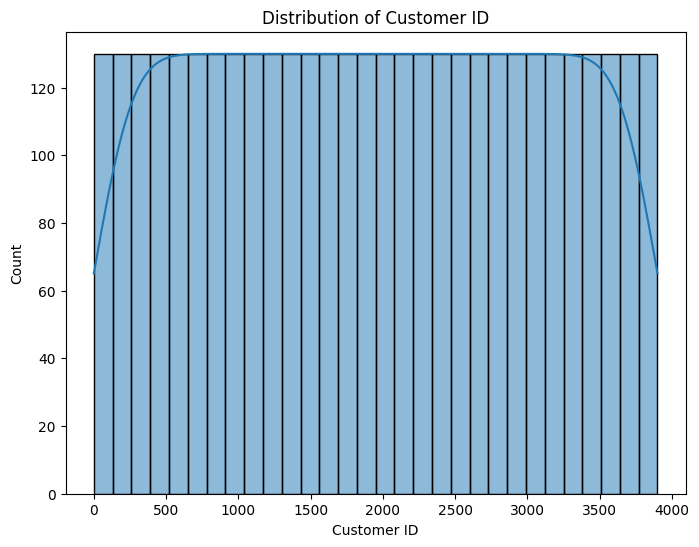

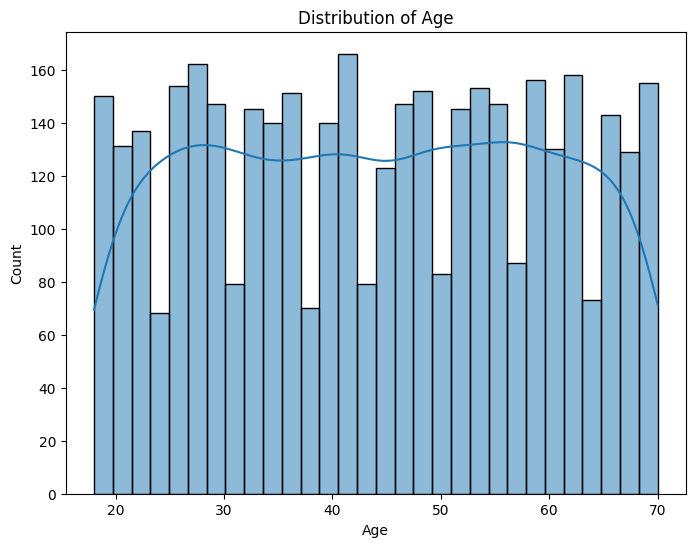

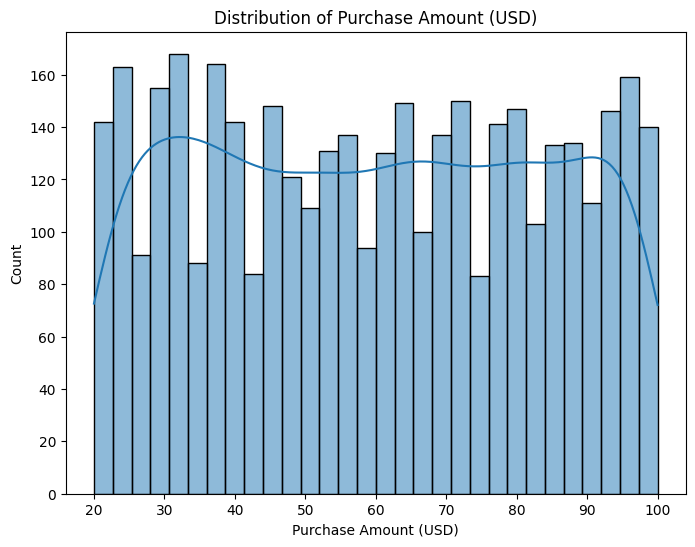

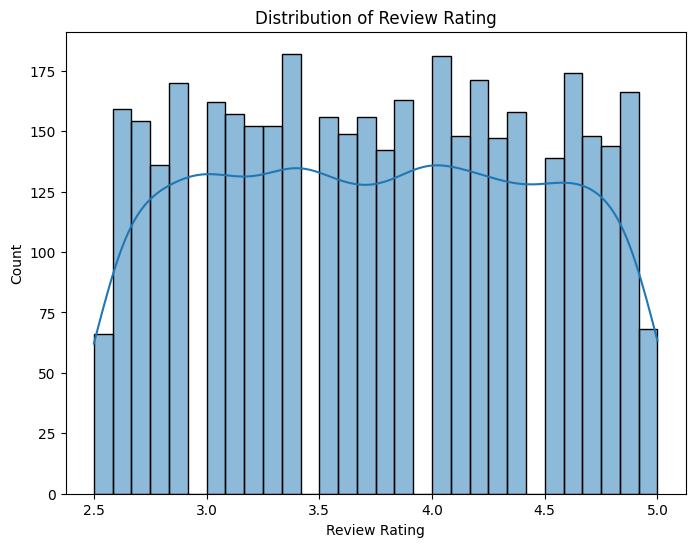

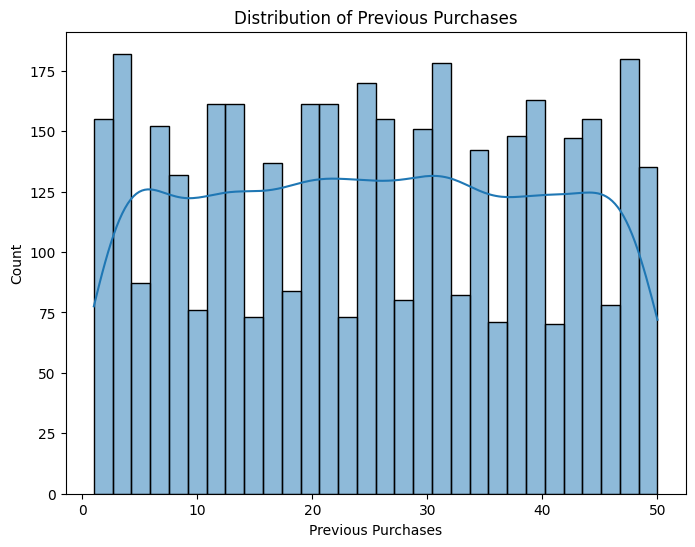

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=col, bins=30, kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

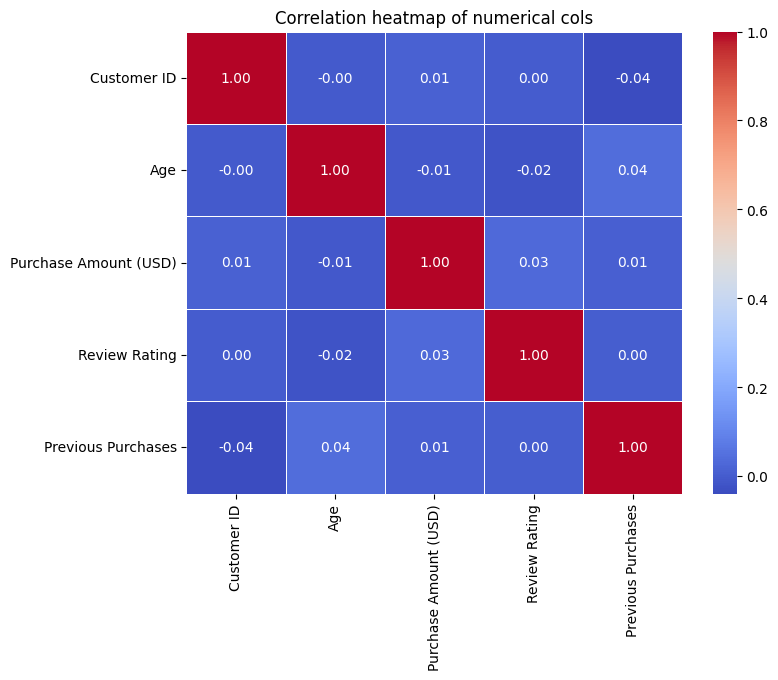

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, fmt=".2f", linewidths=.5, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap of numerical cols")
plt.show()

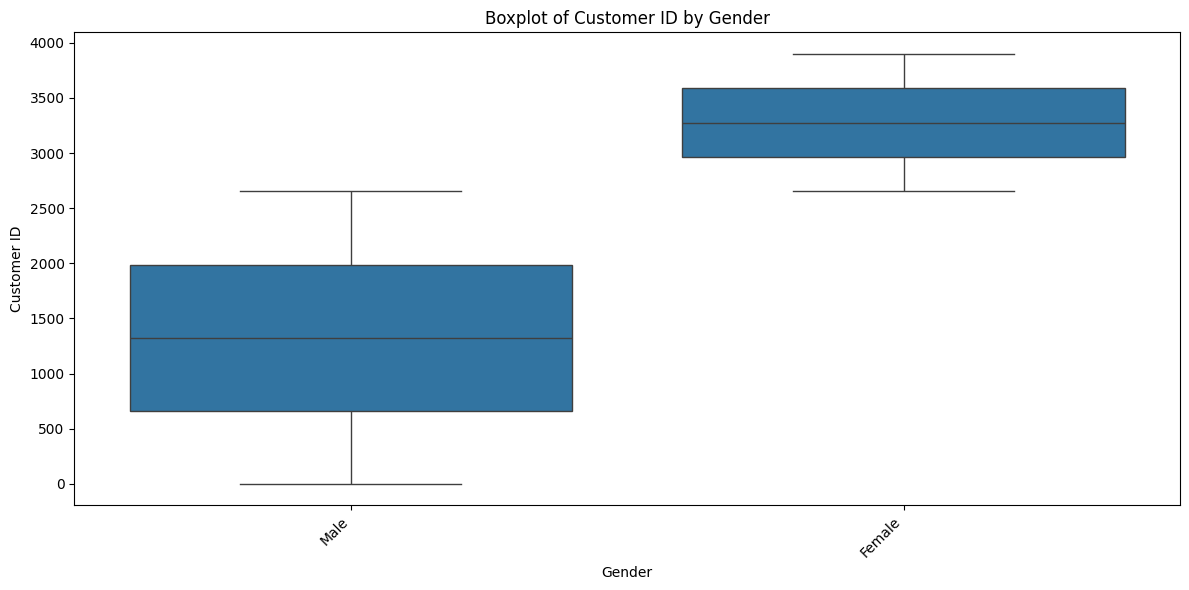

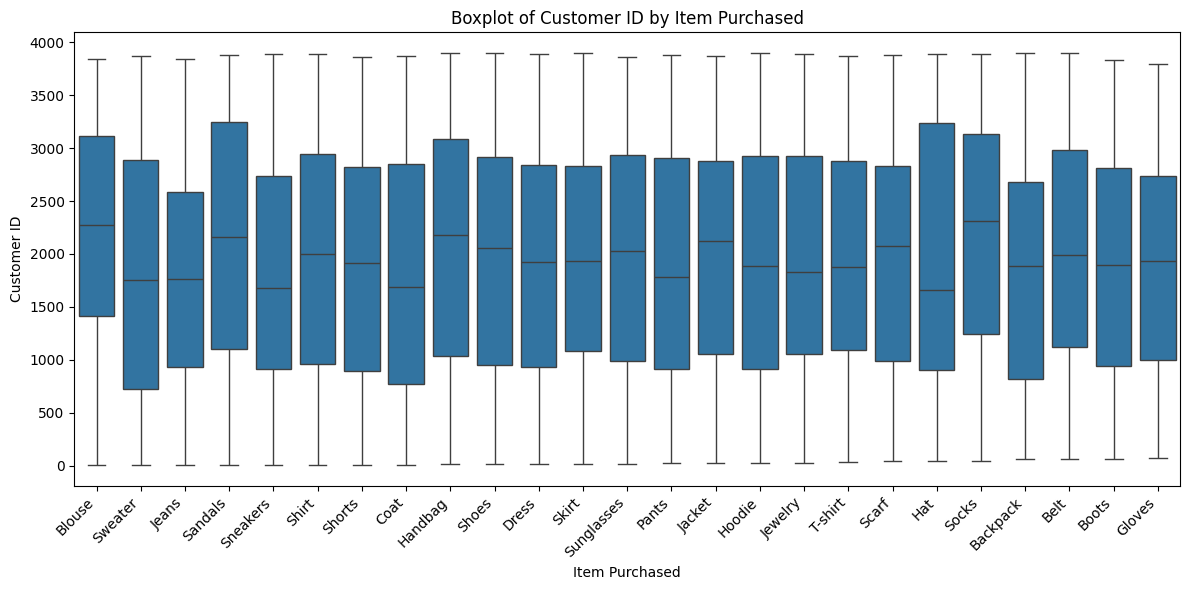

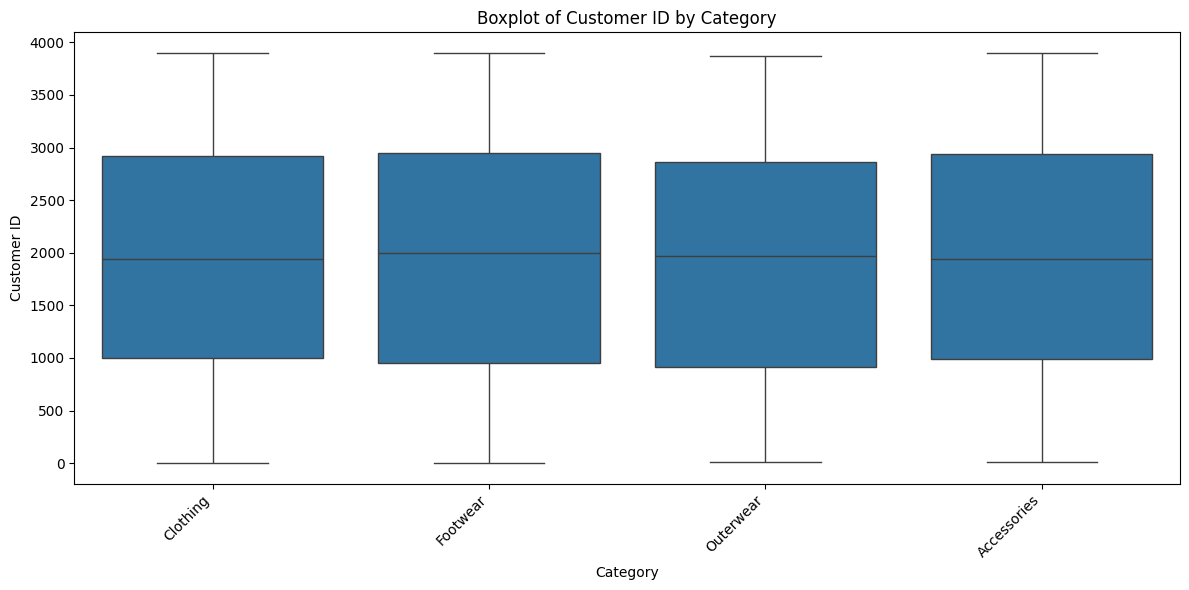

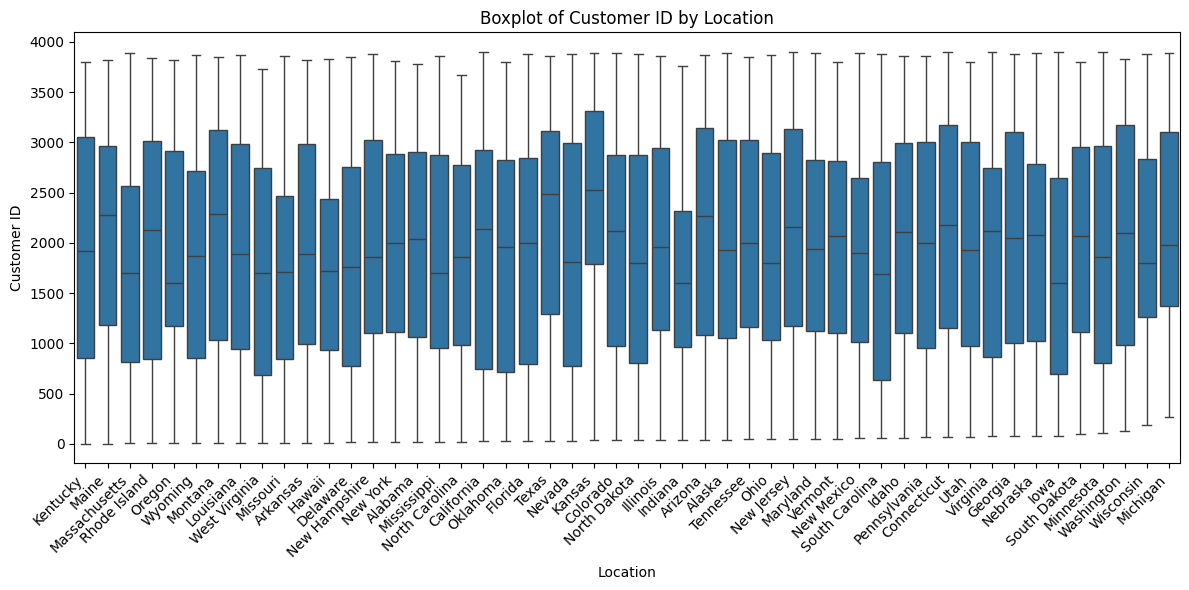

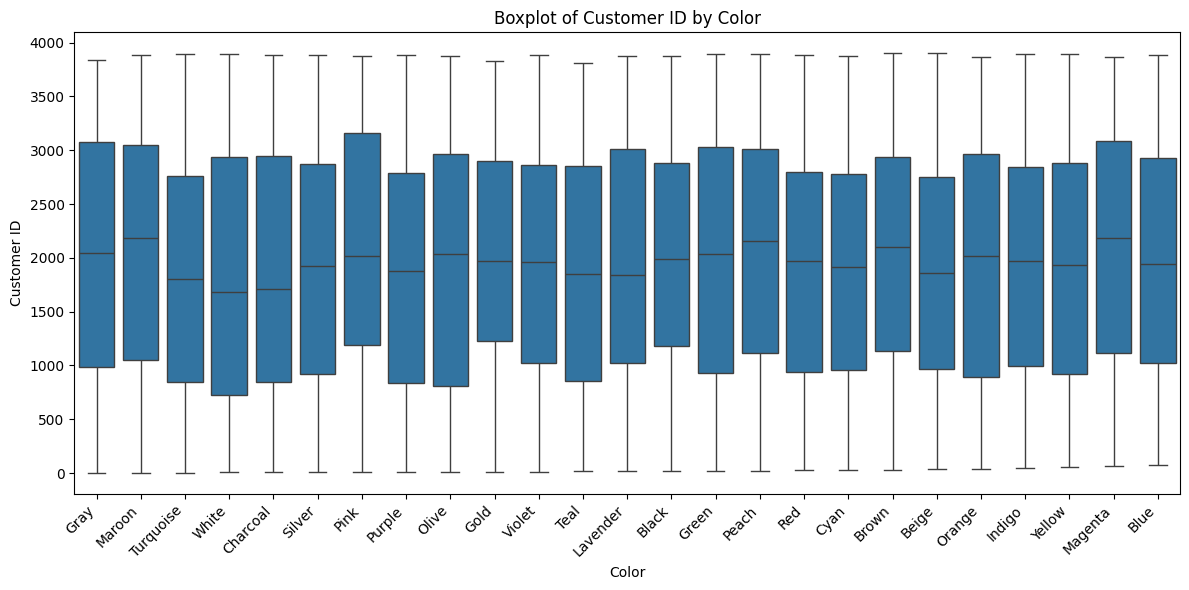

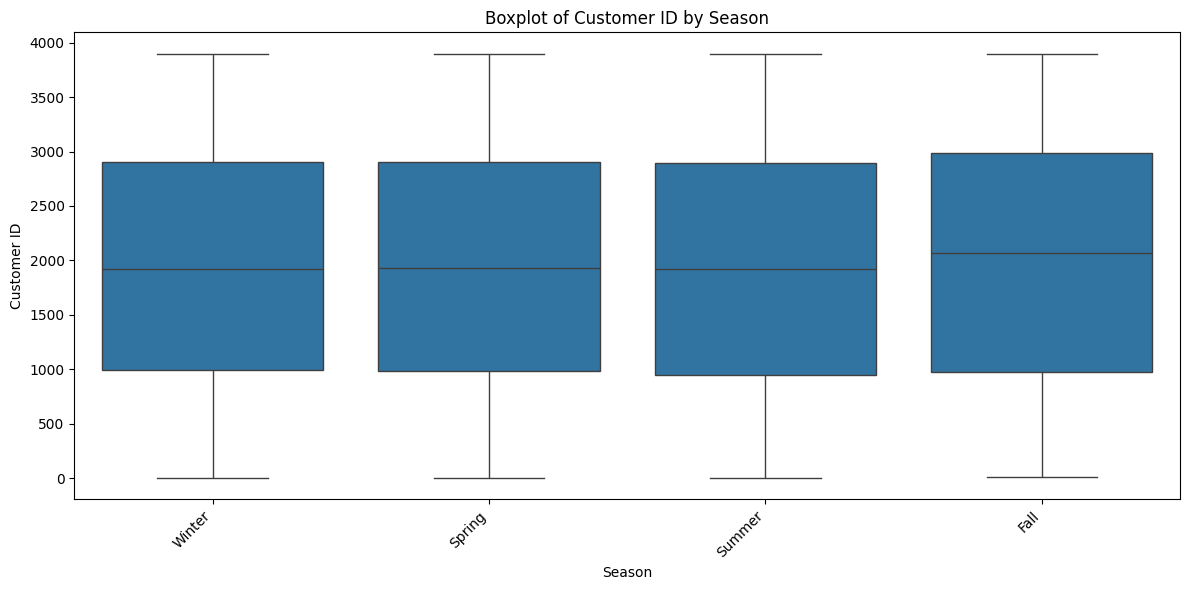

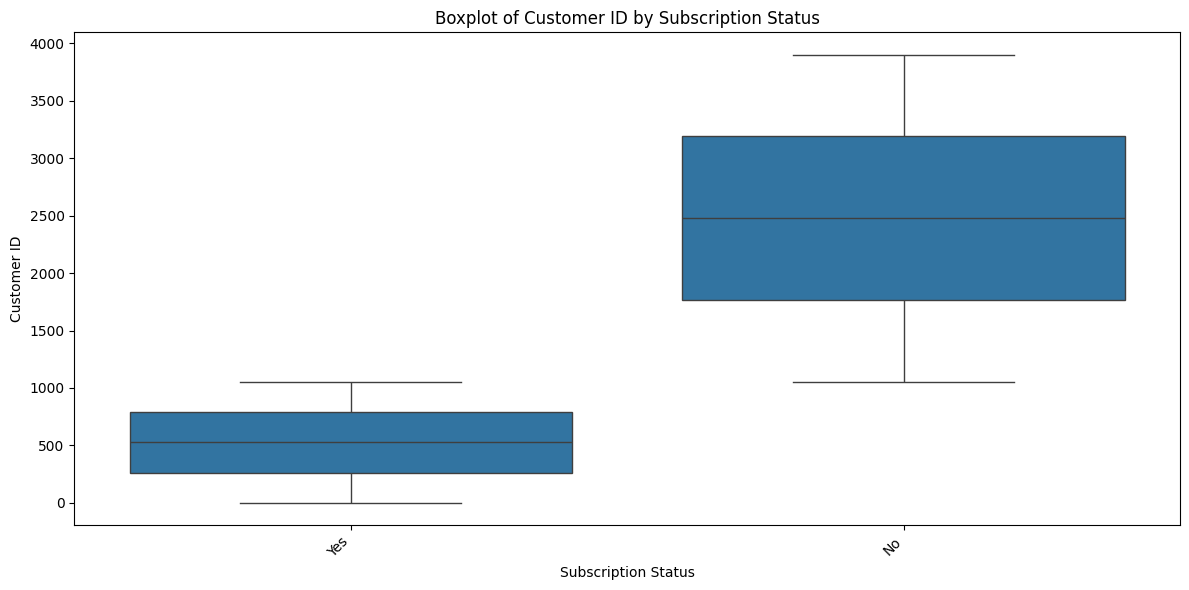

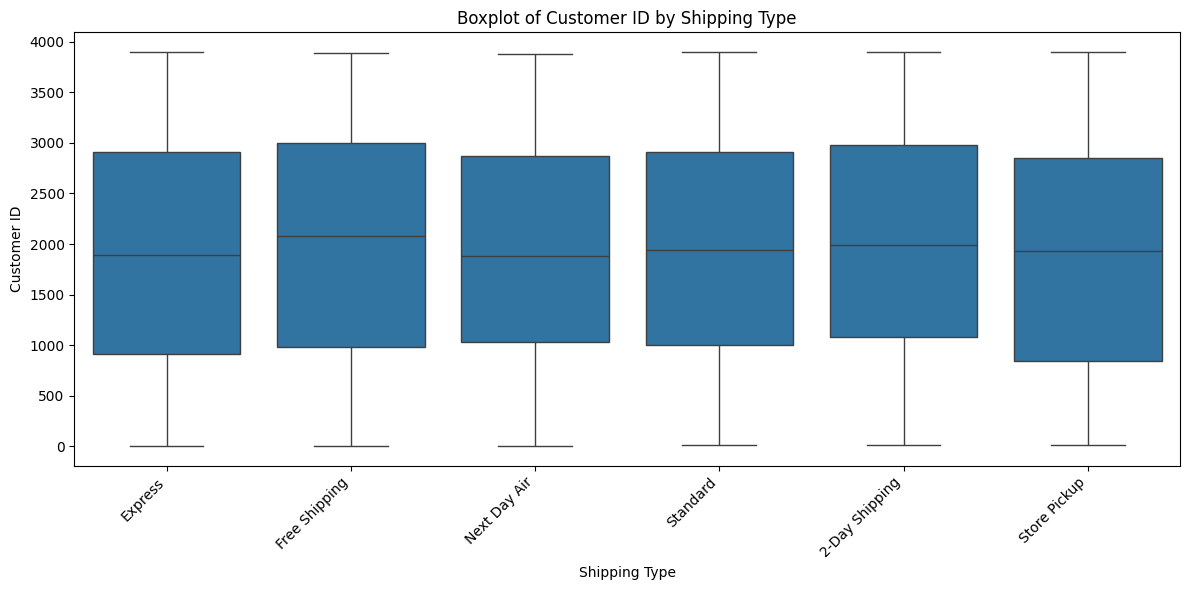

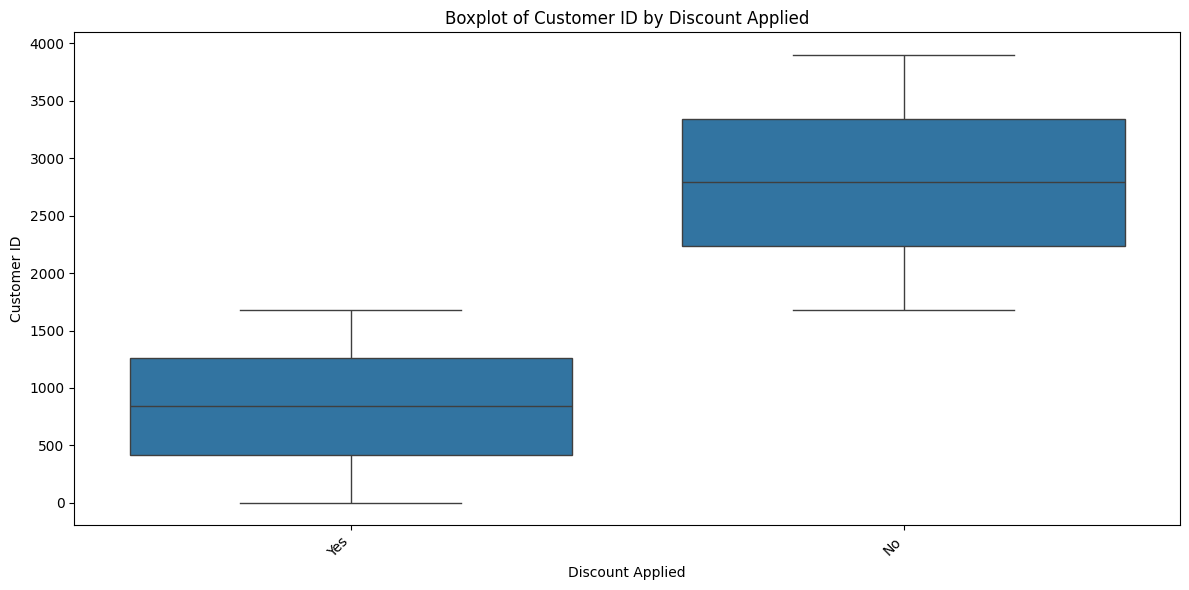

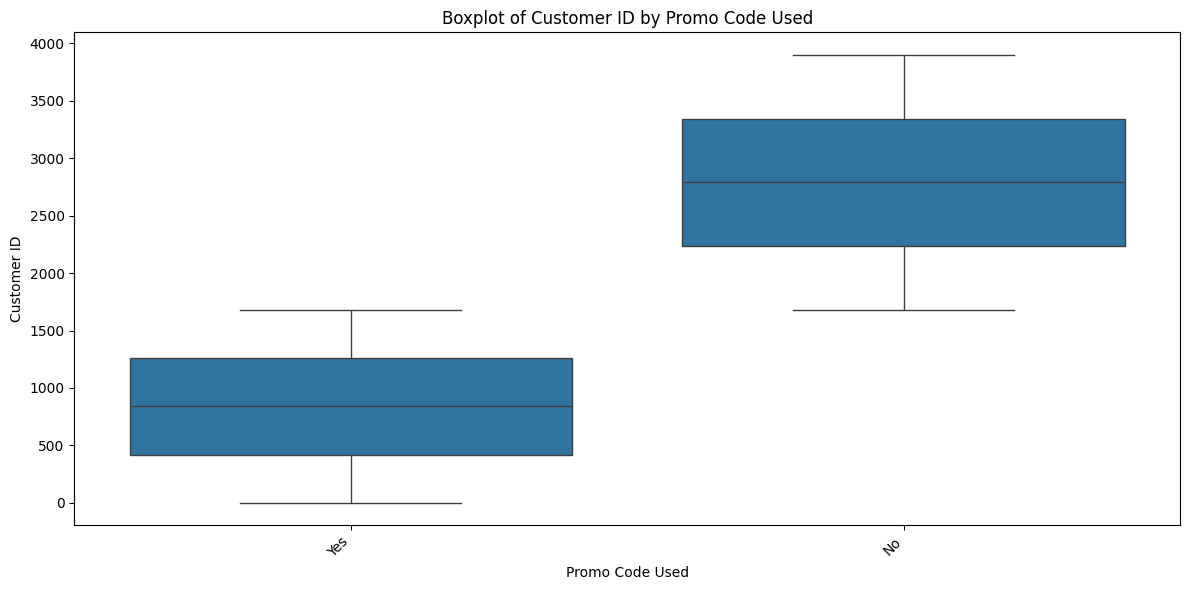

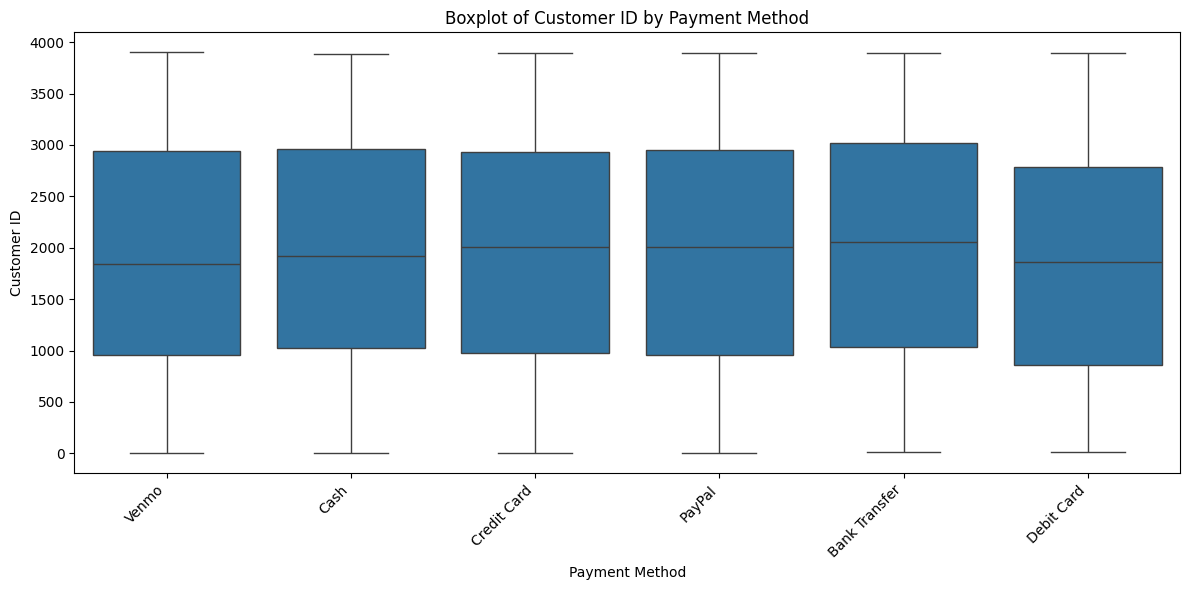

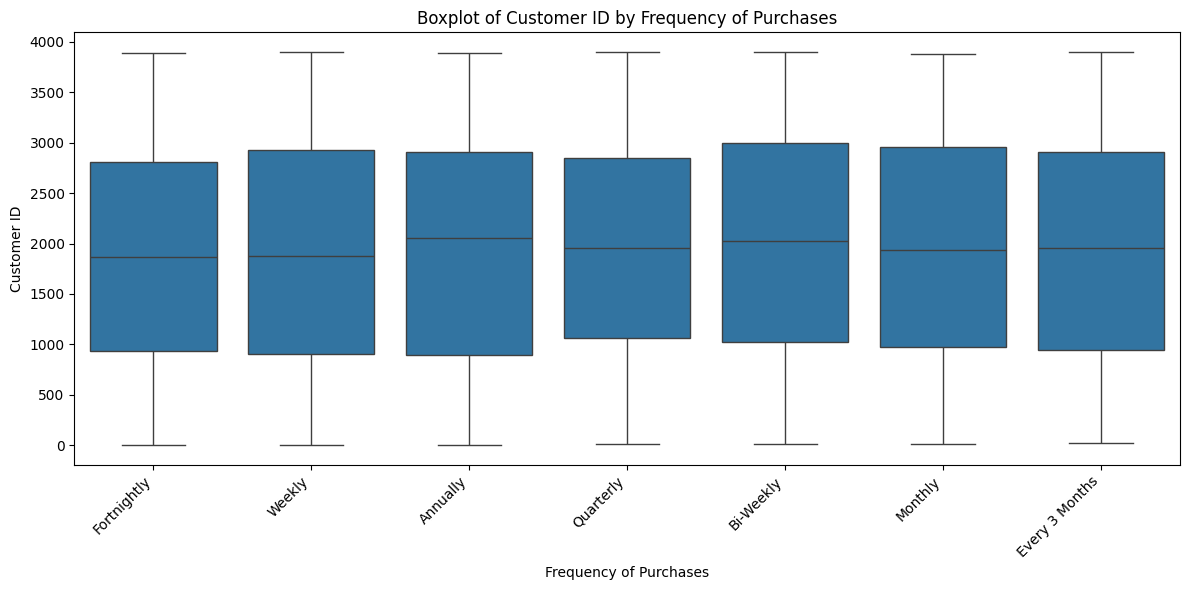

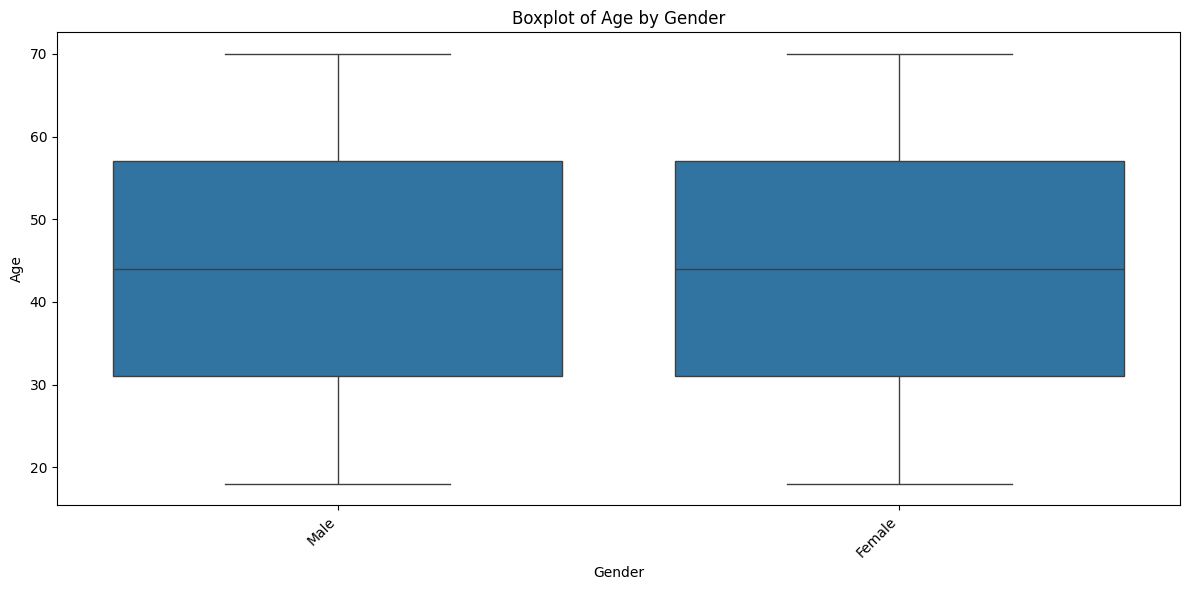

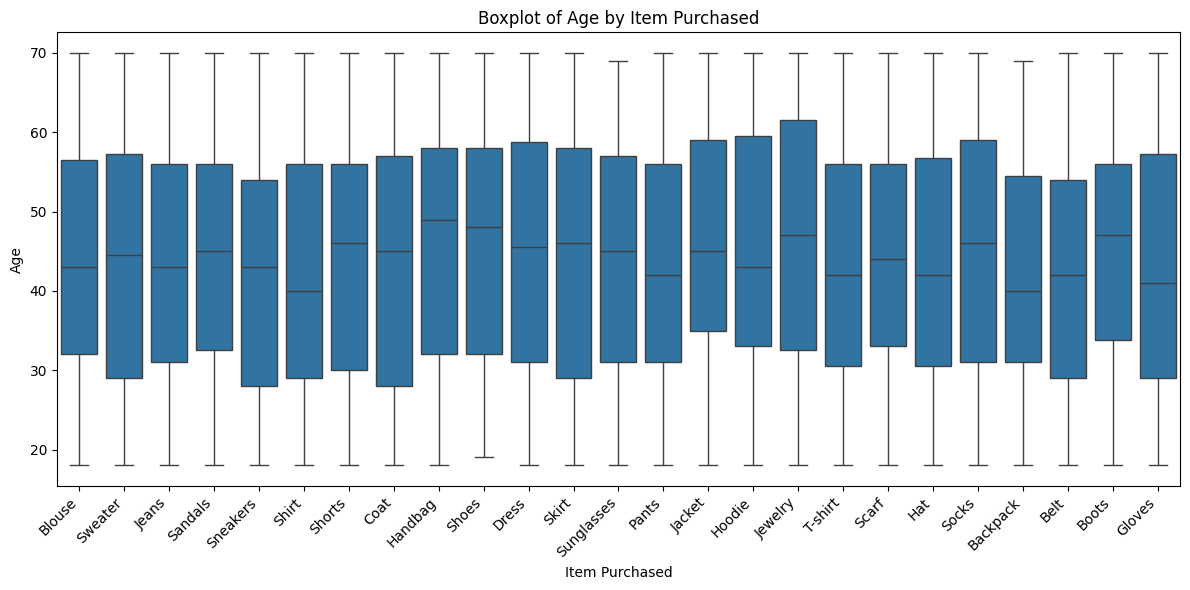

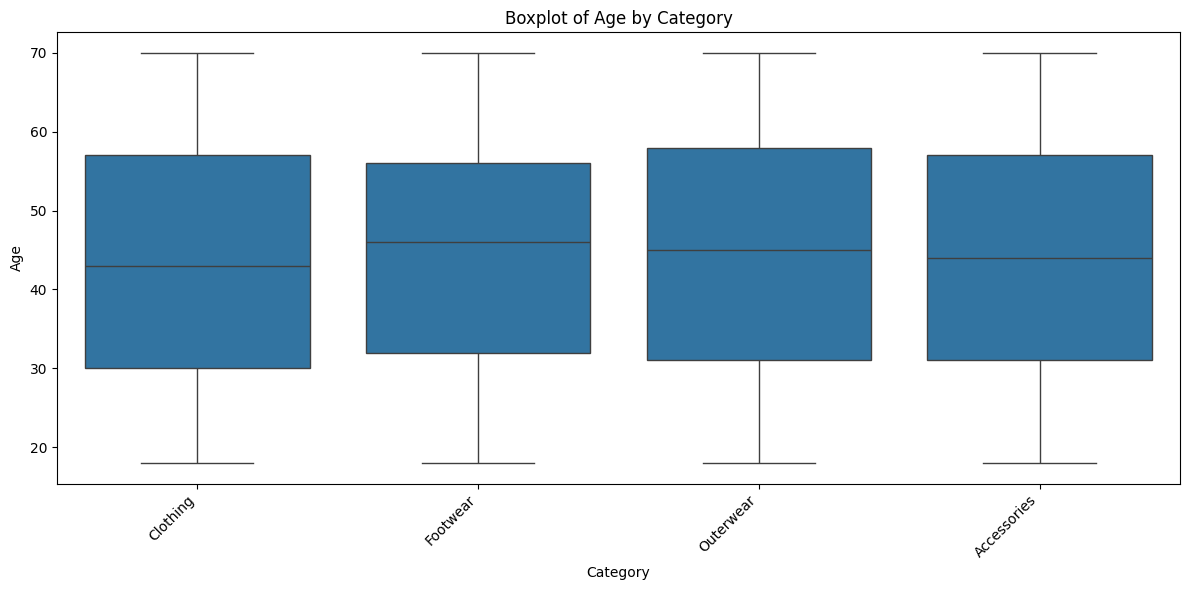

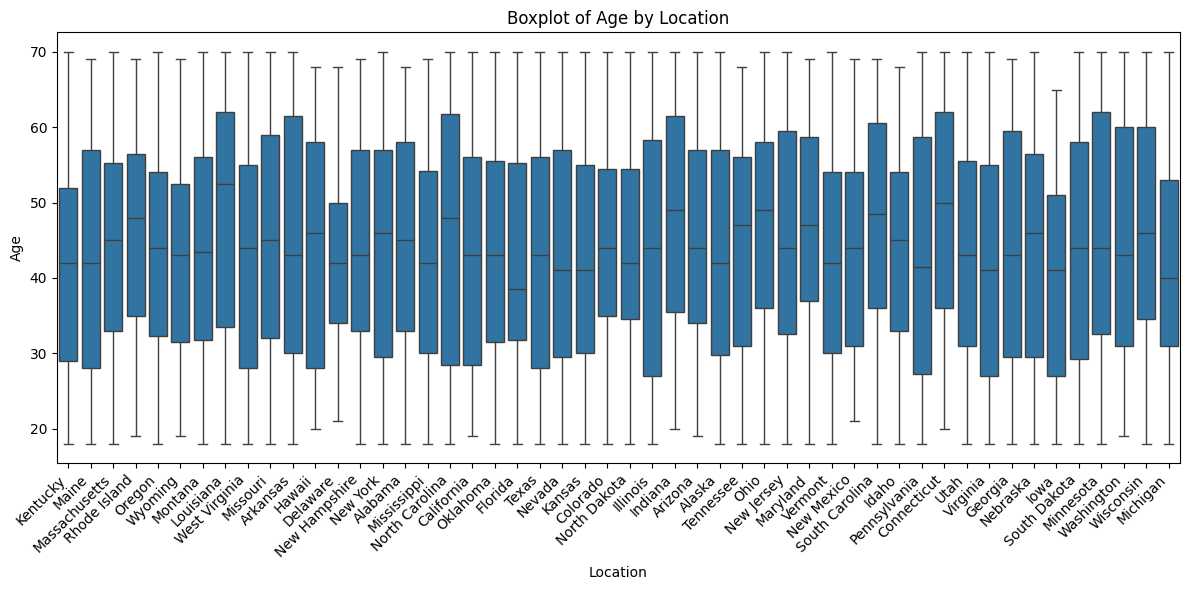

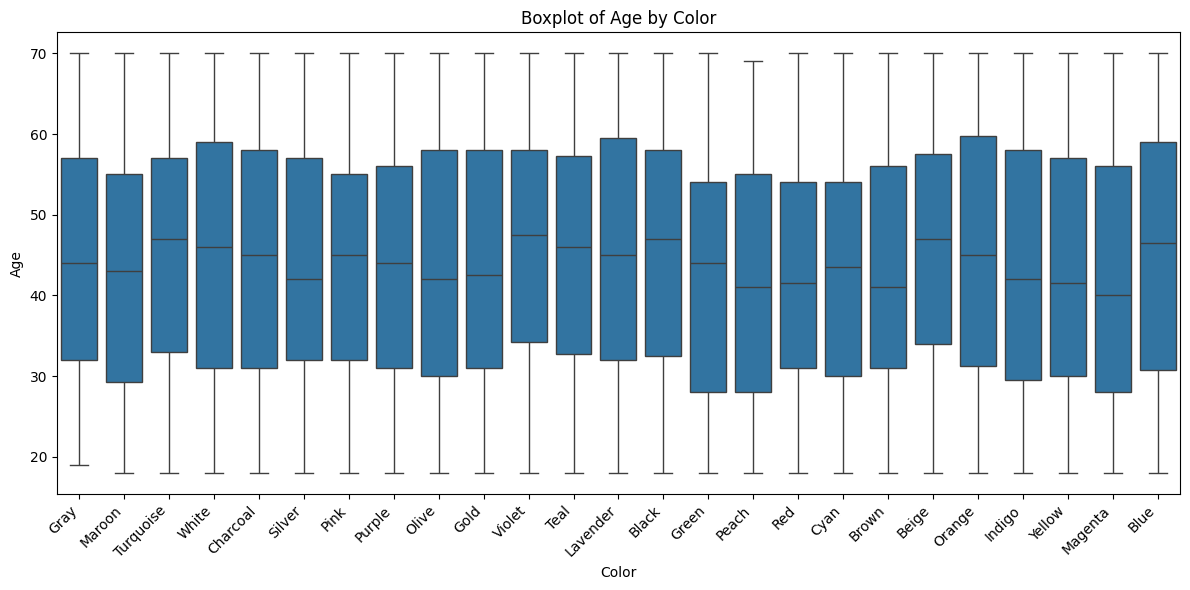

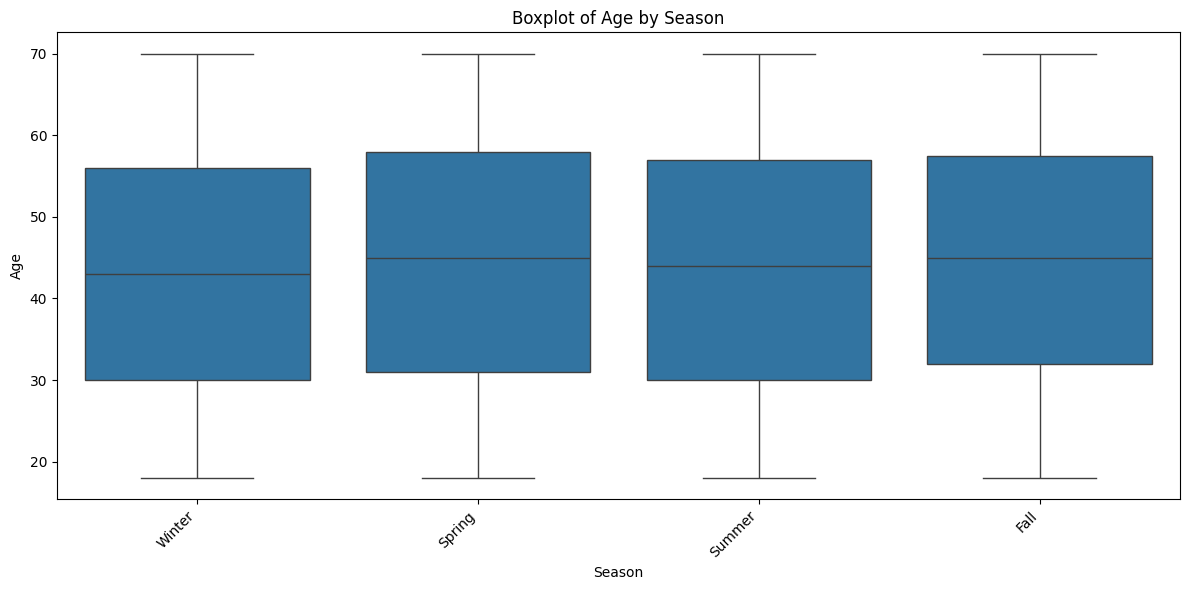

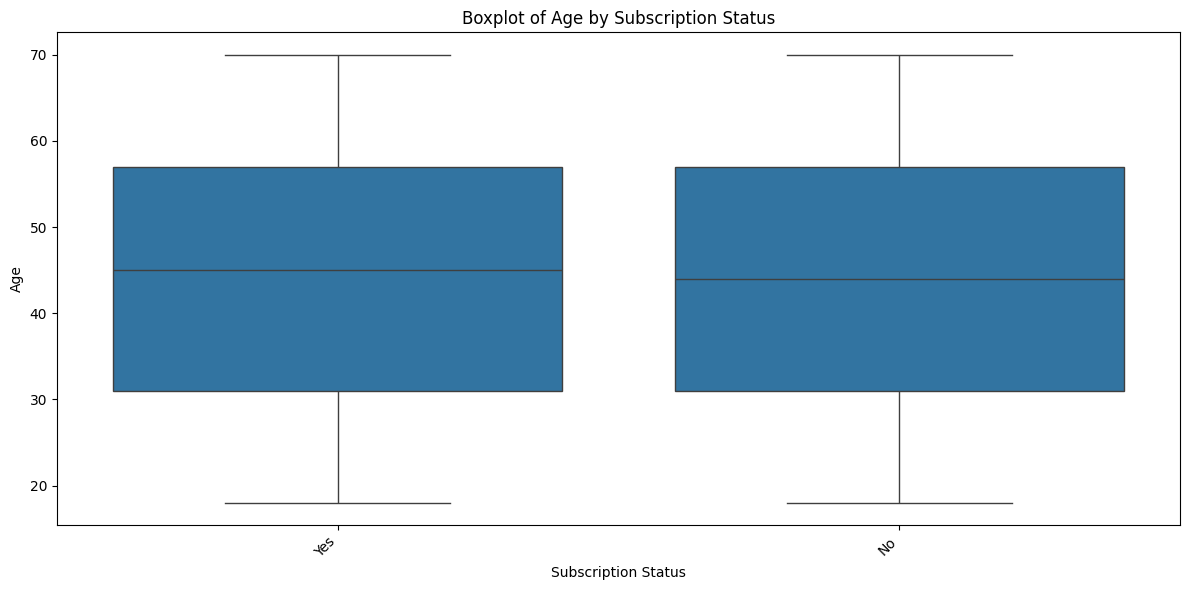

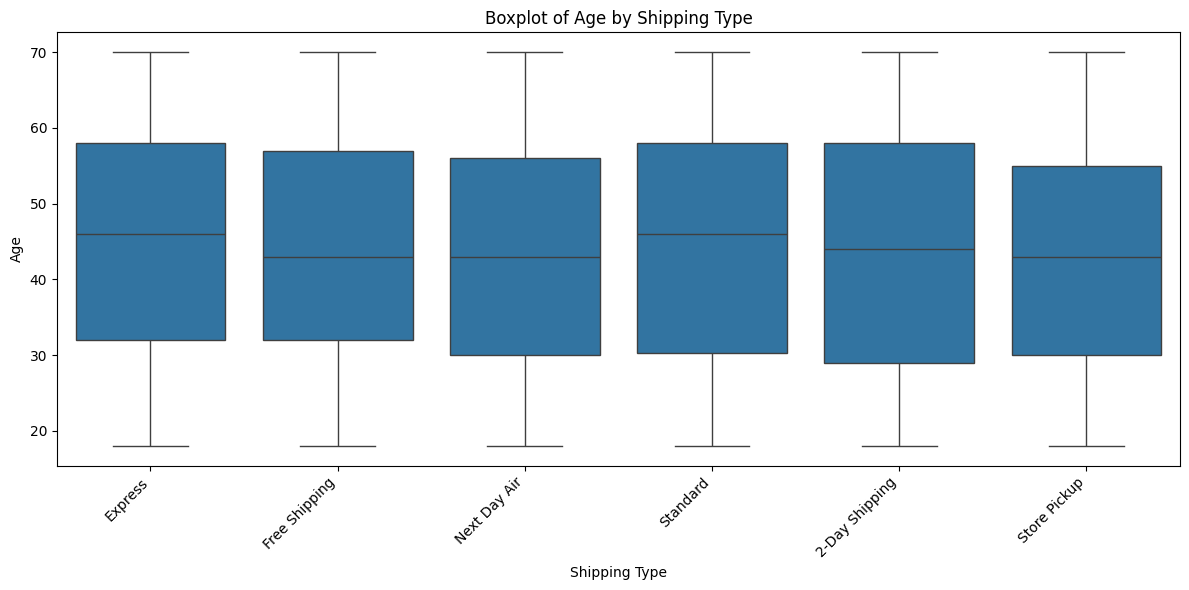

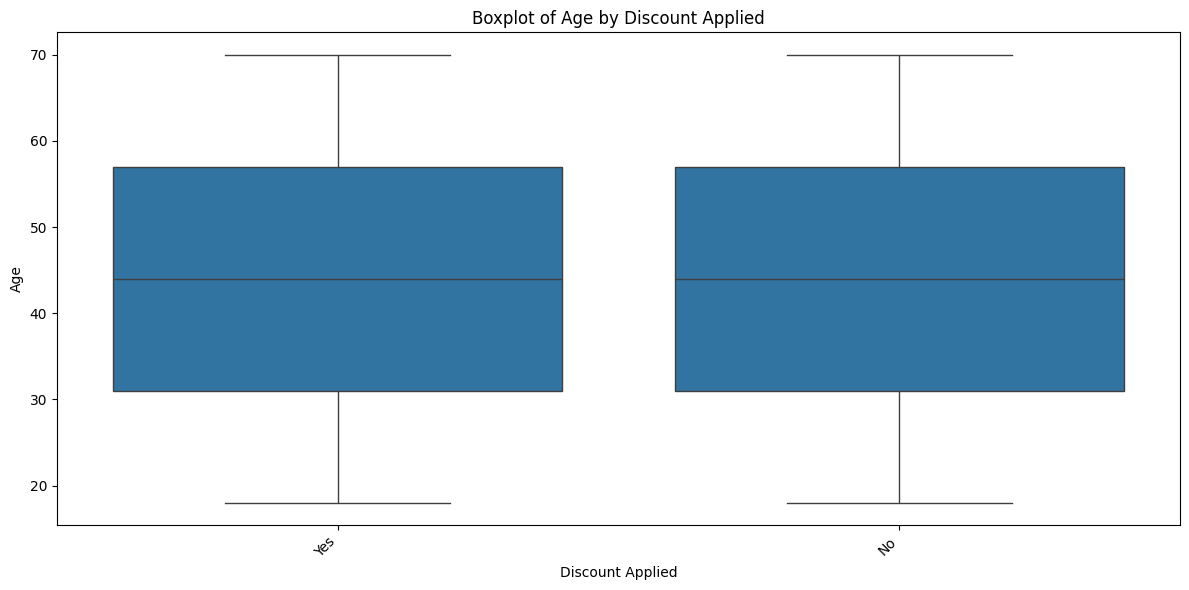

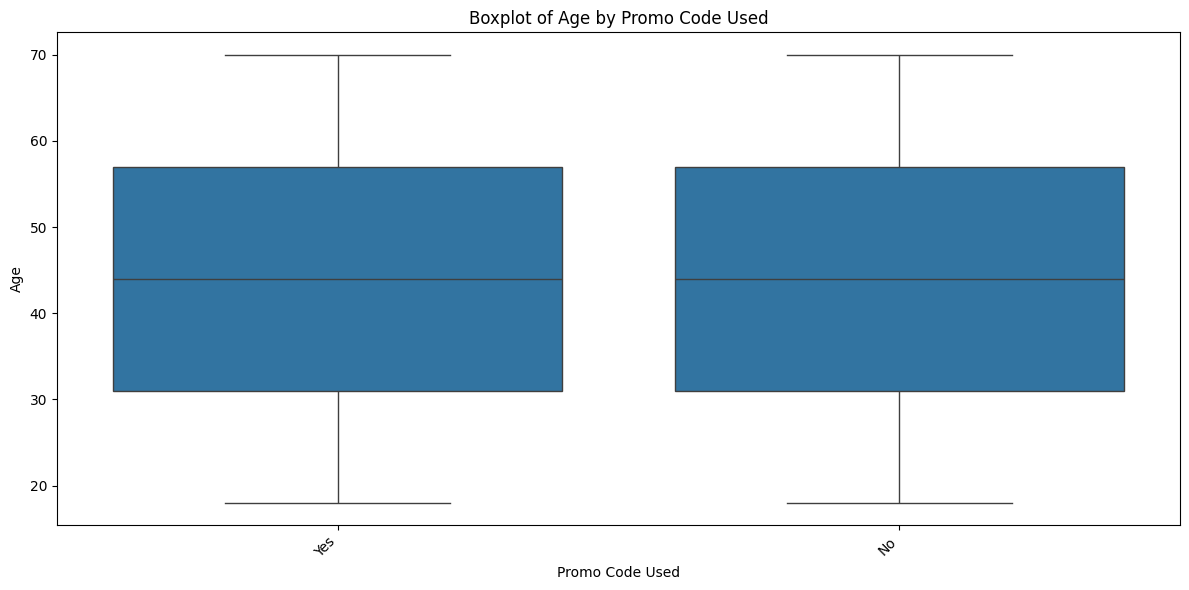

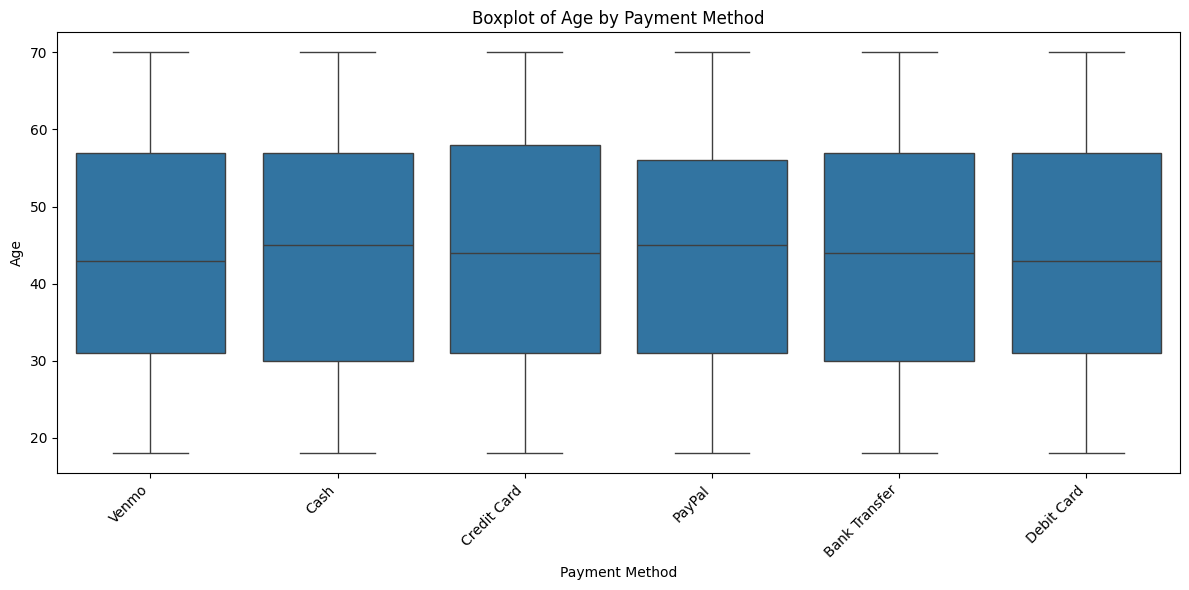

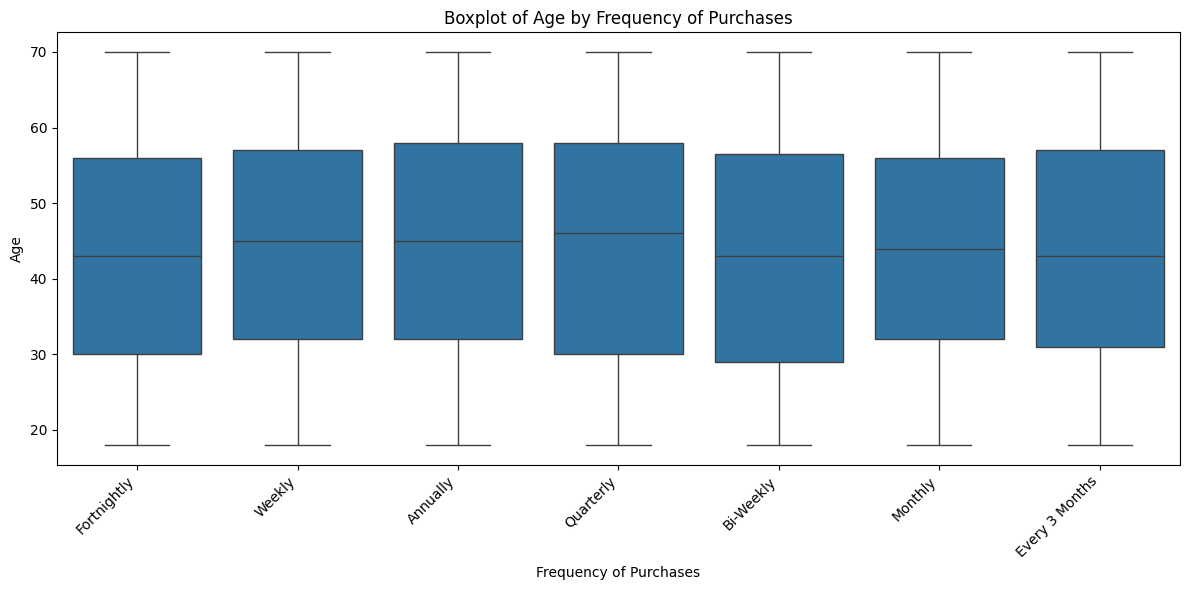

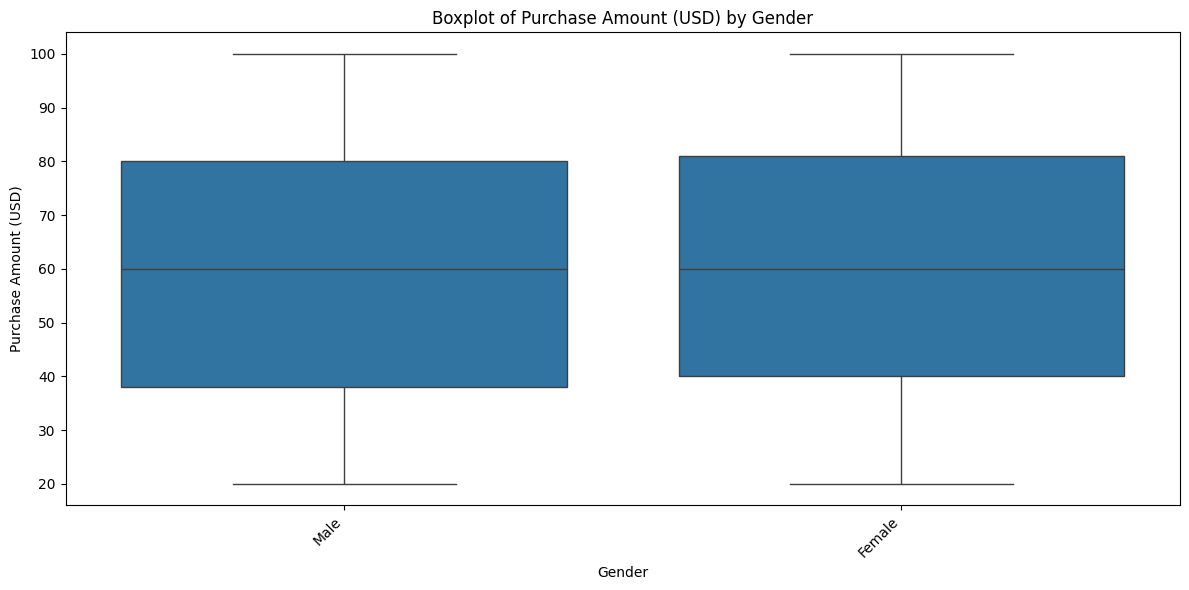

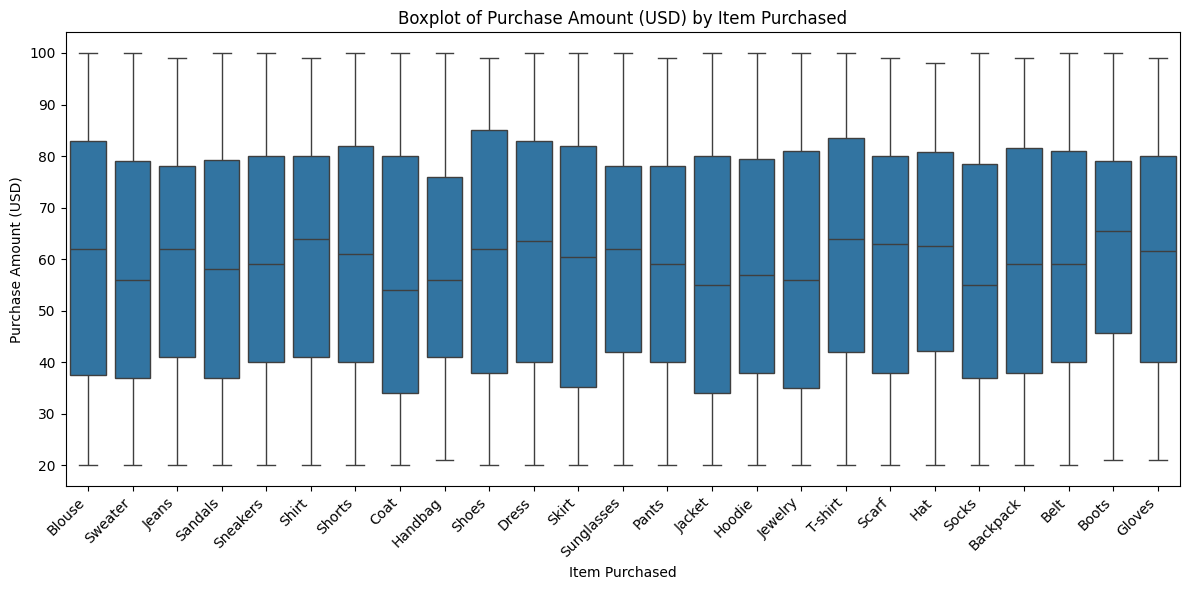

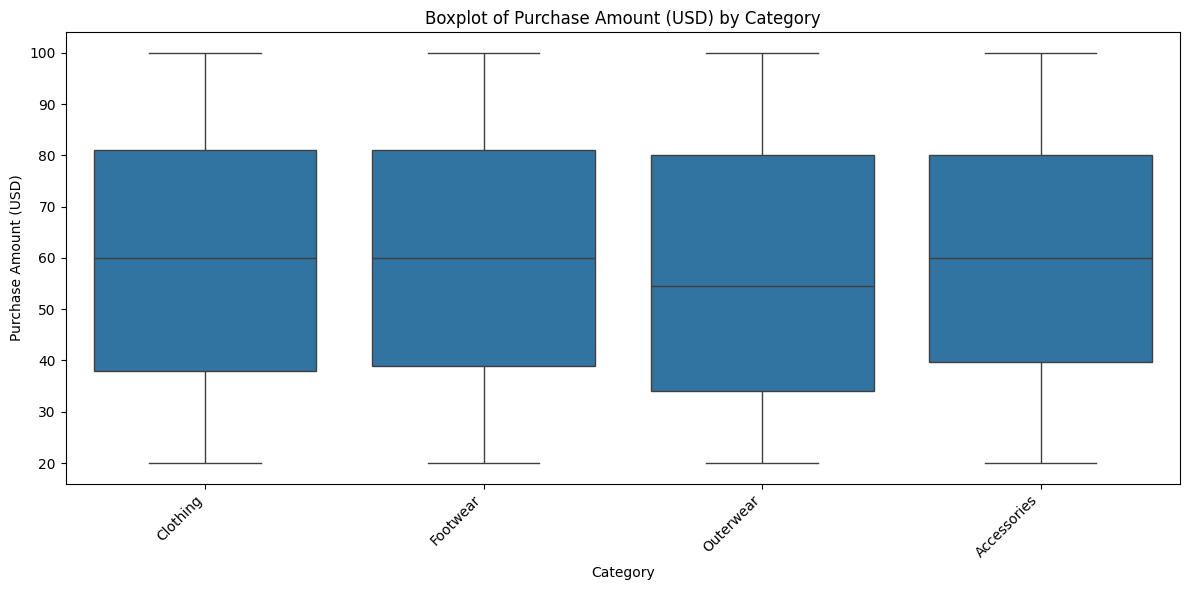

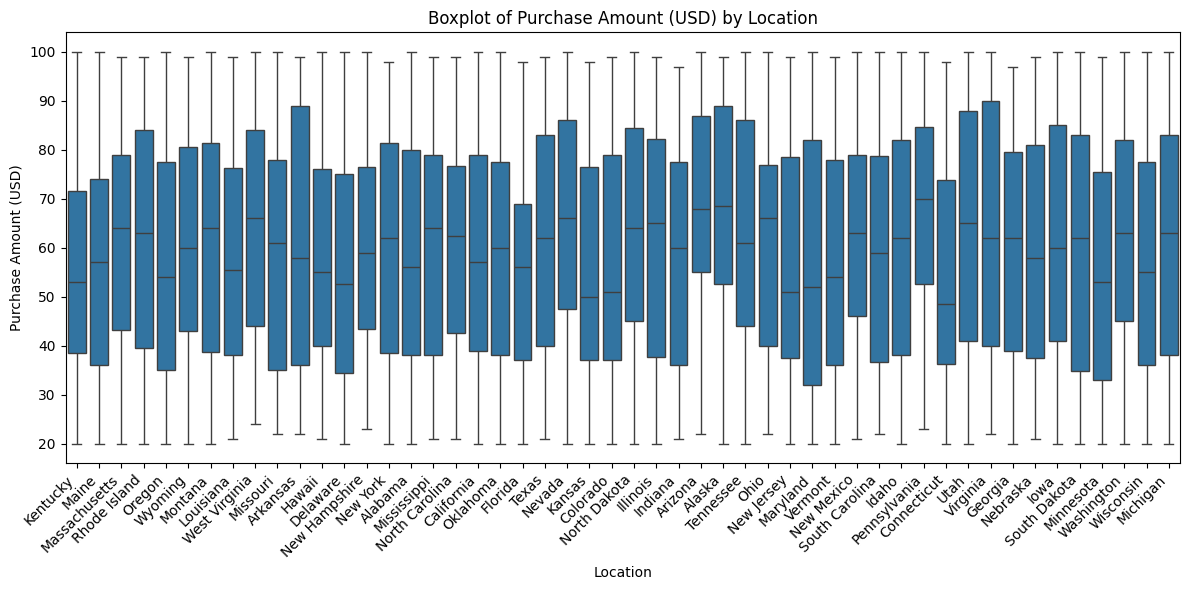

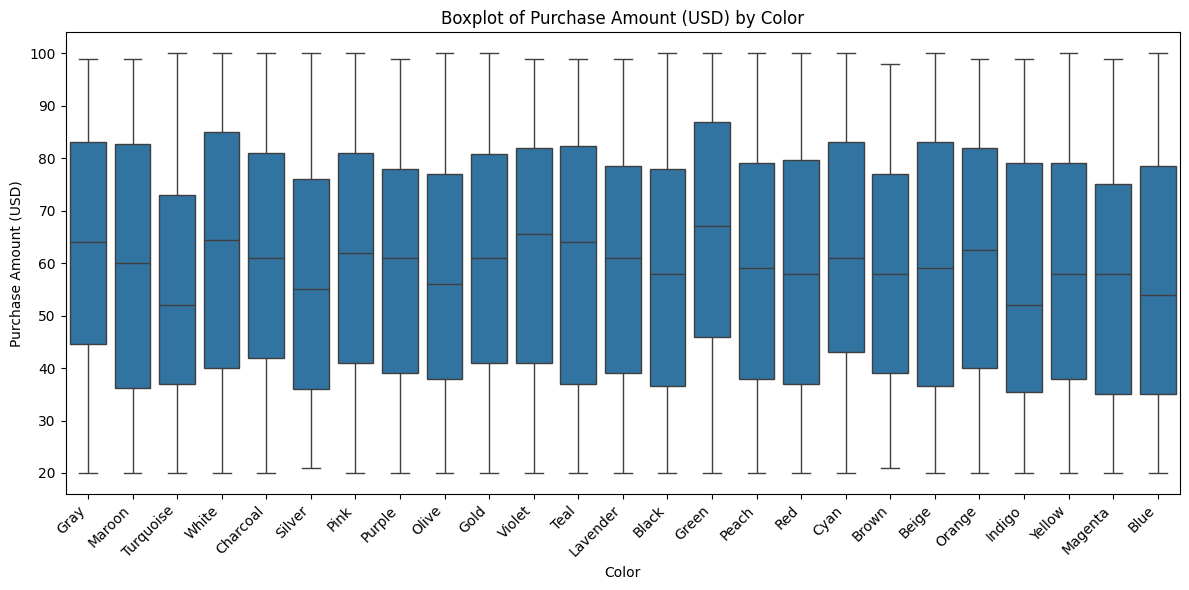

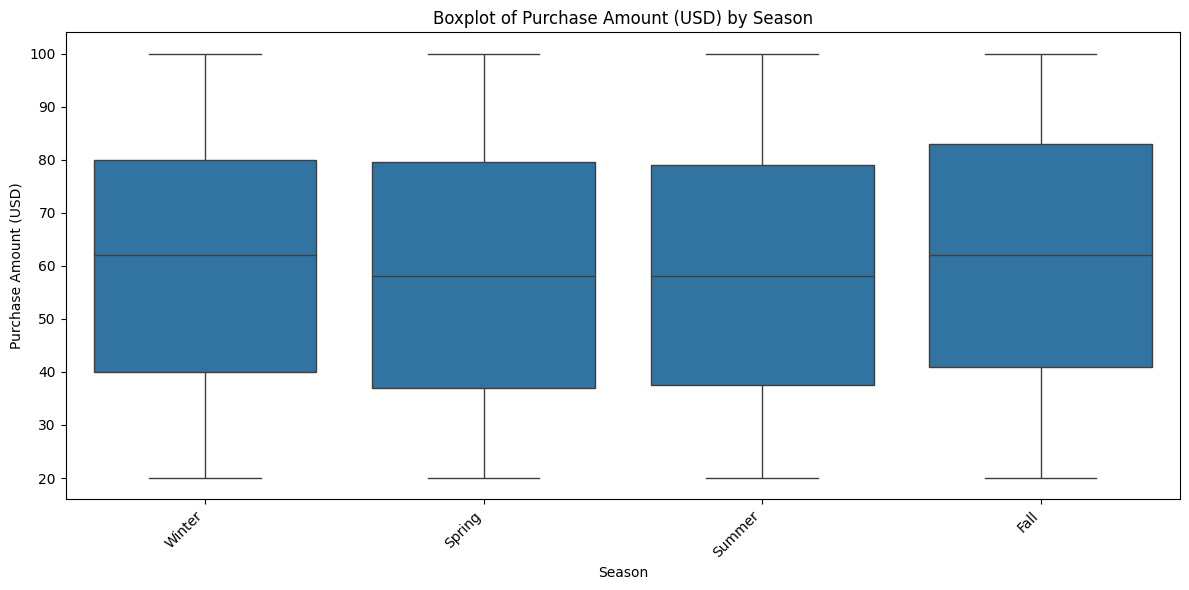

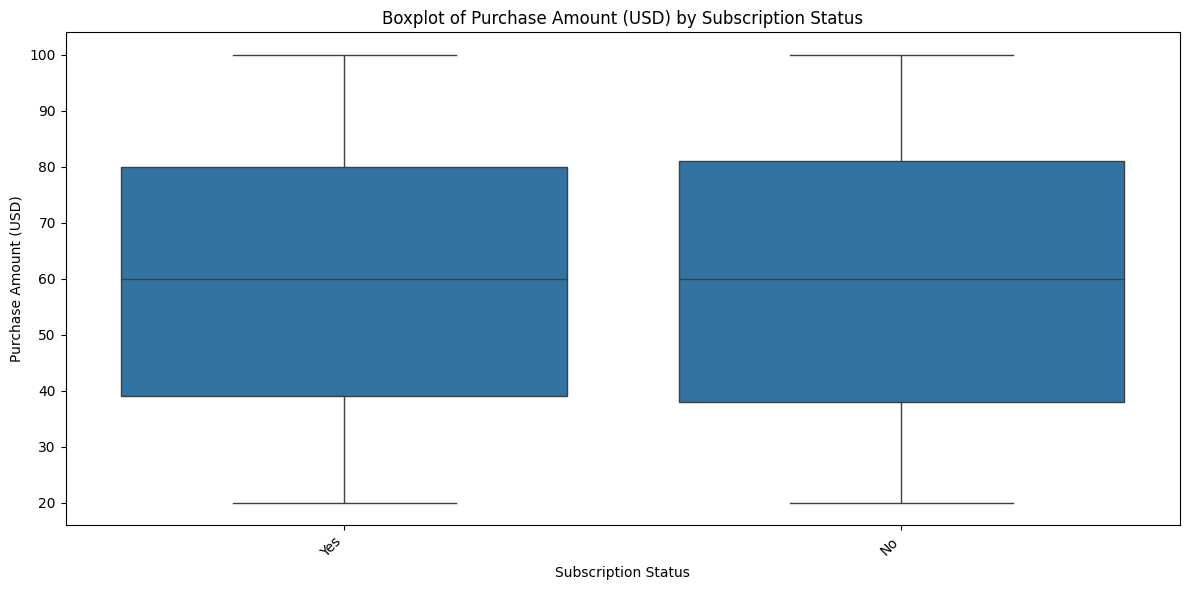

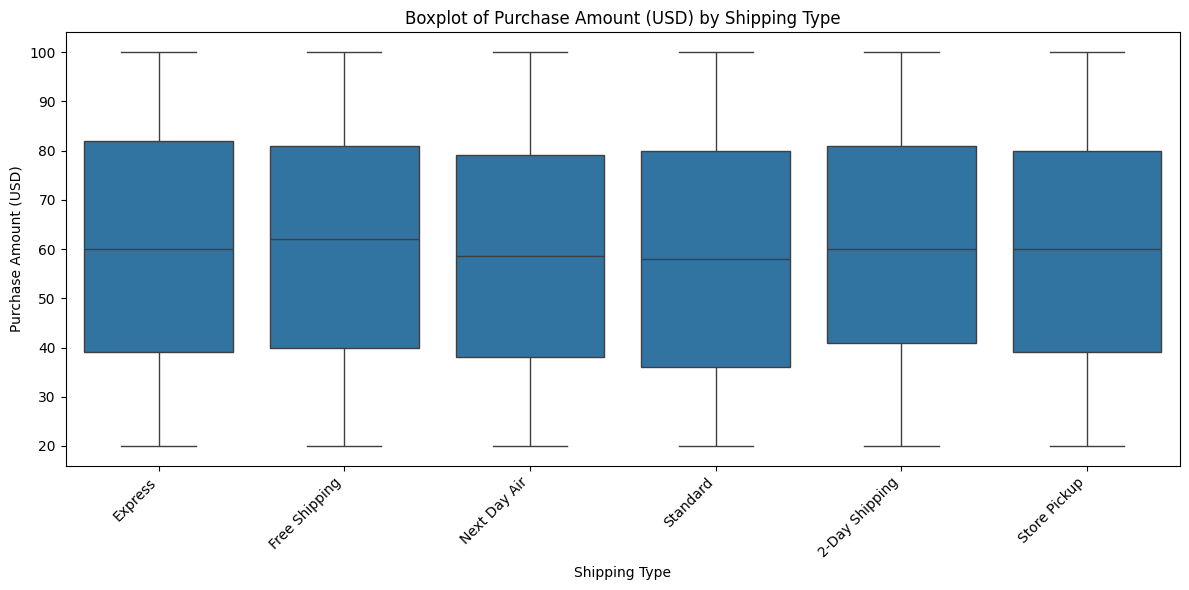

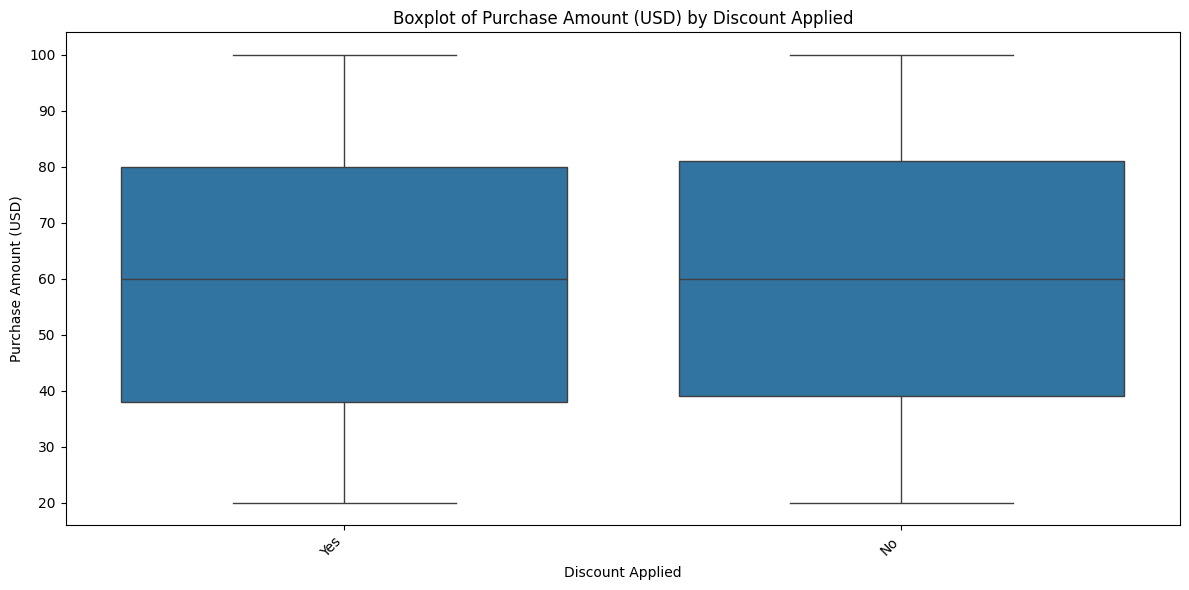

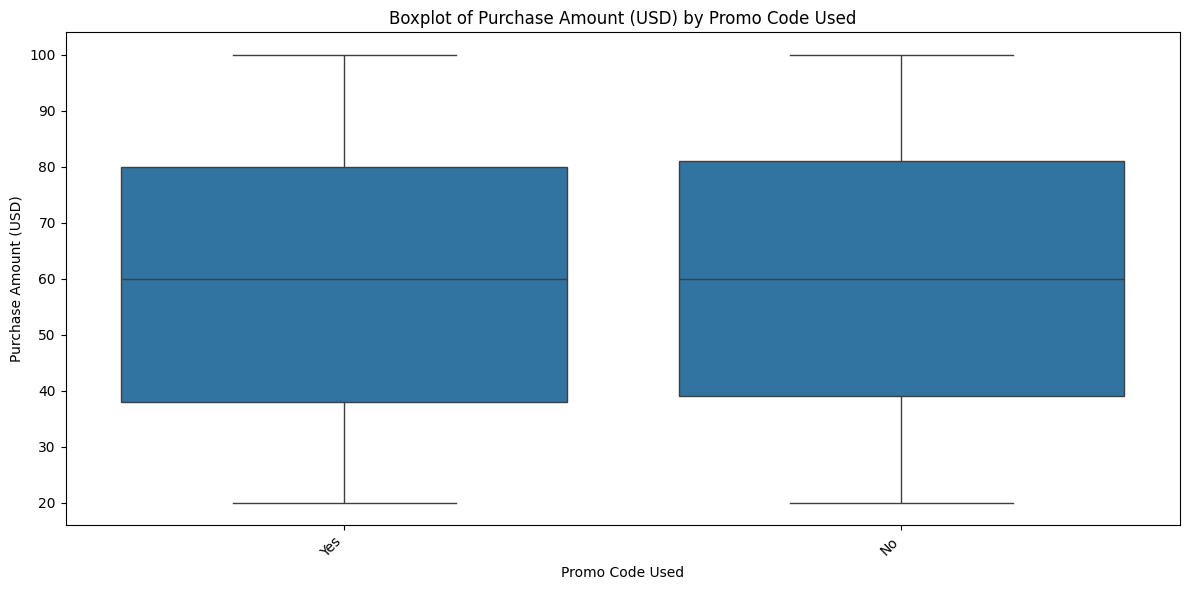

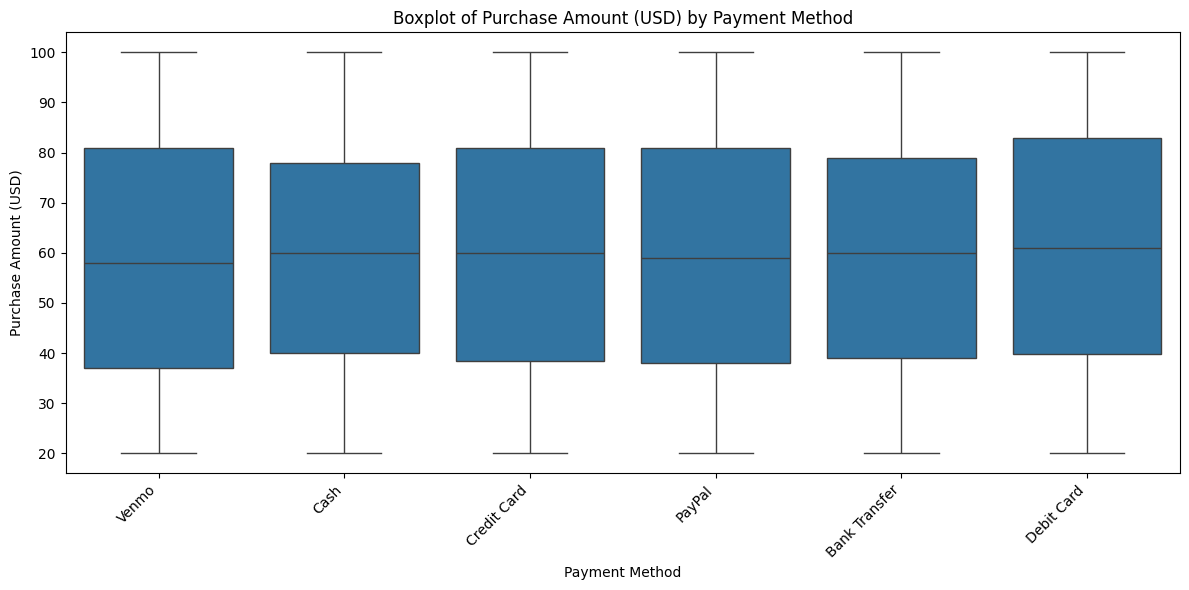

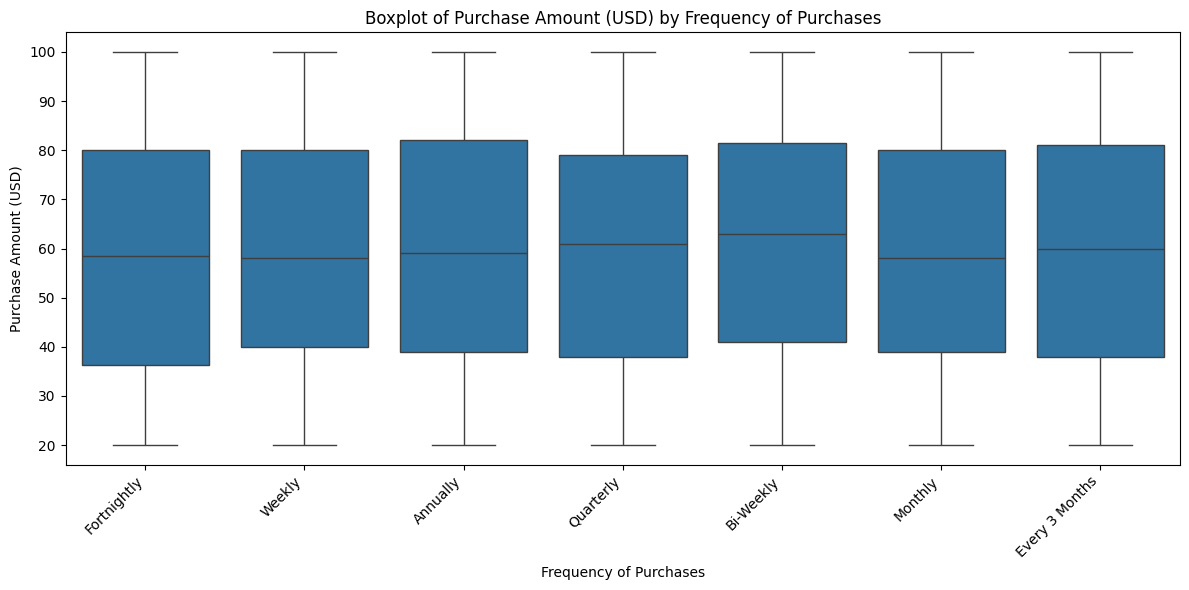

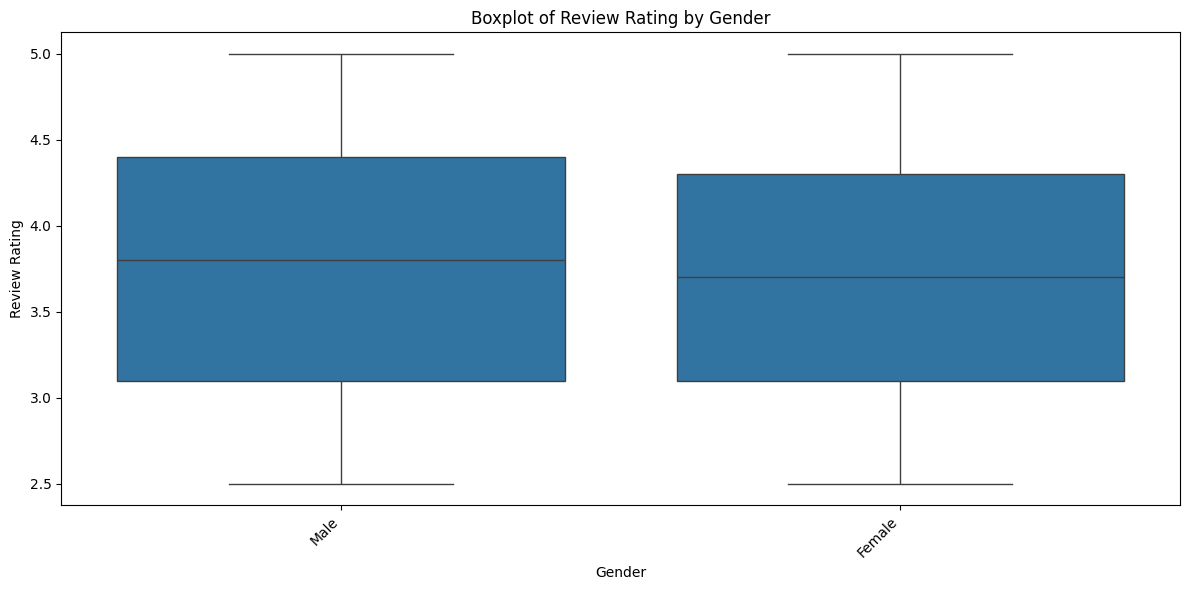

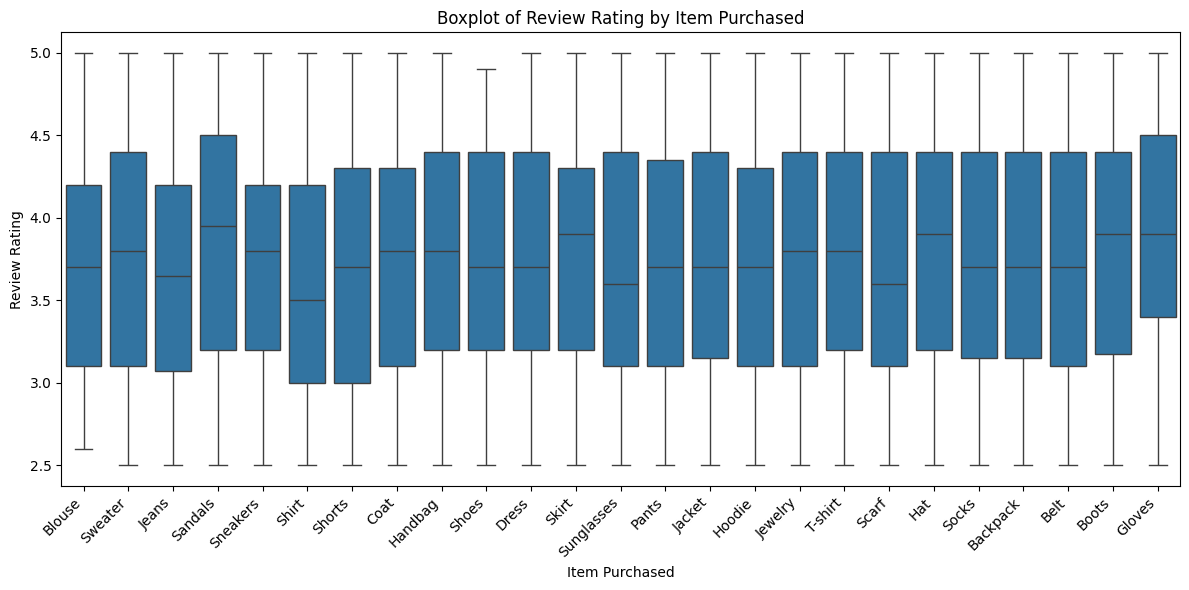

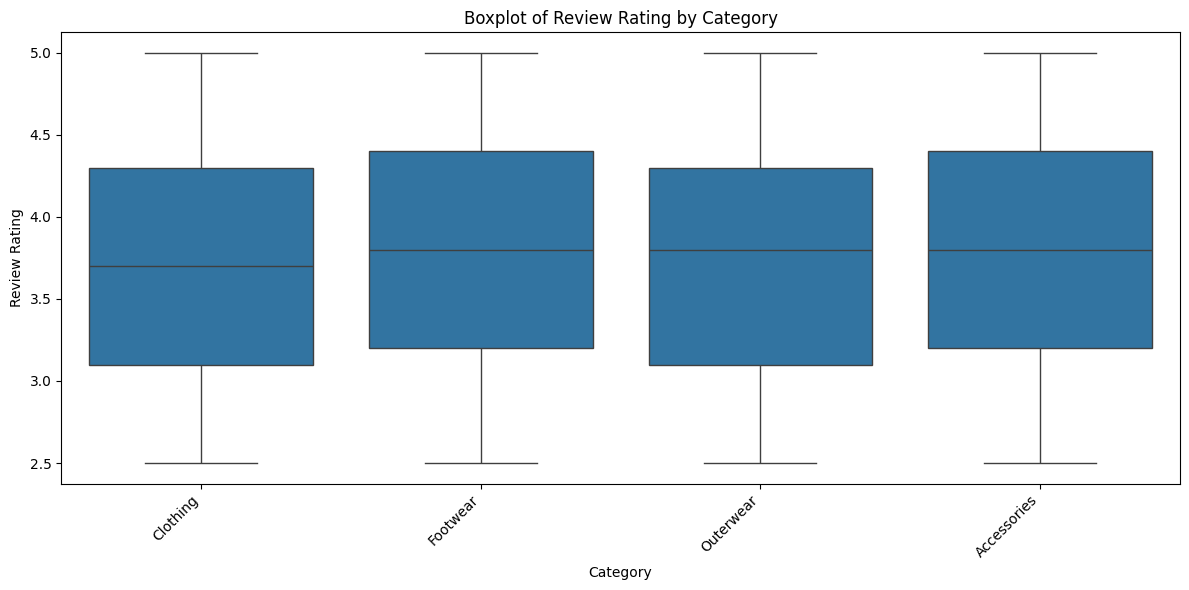

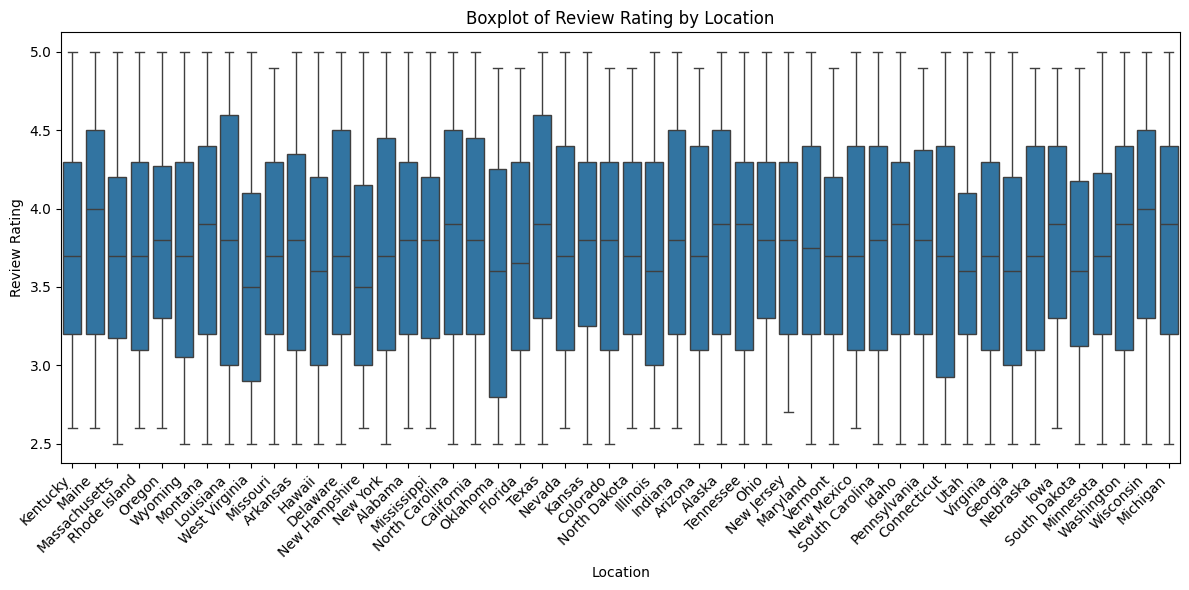

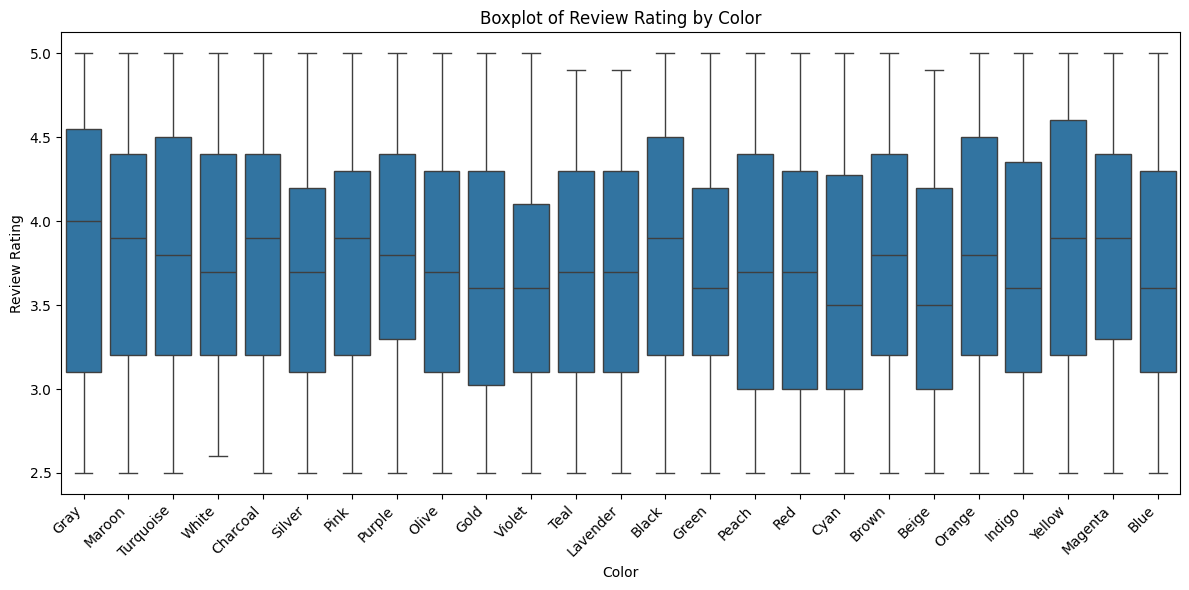

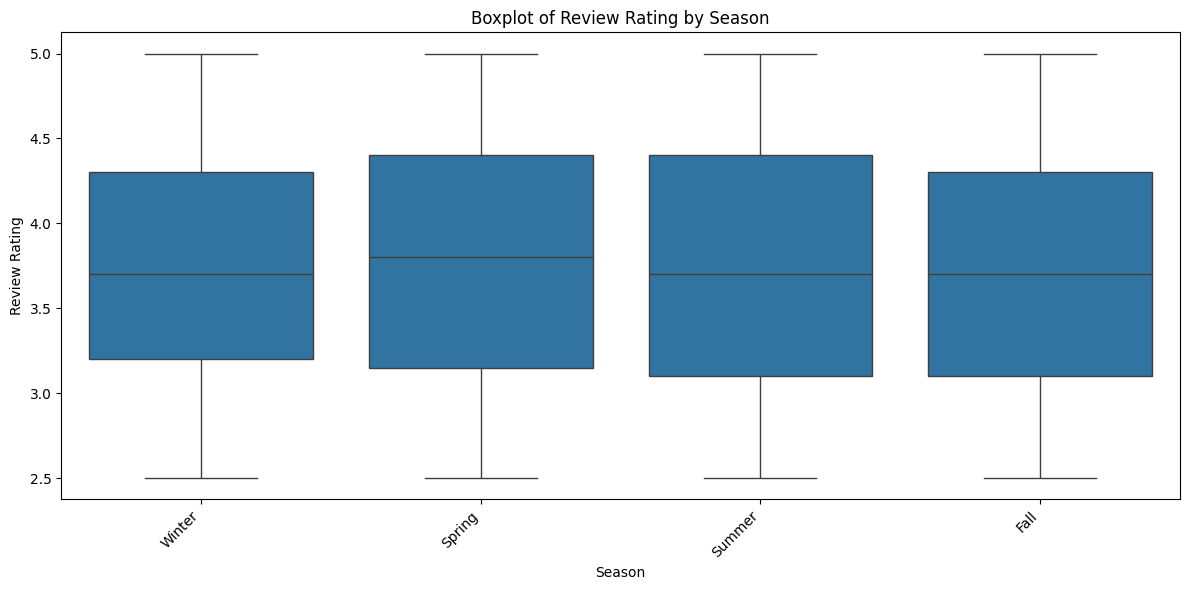

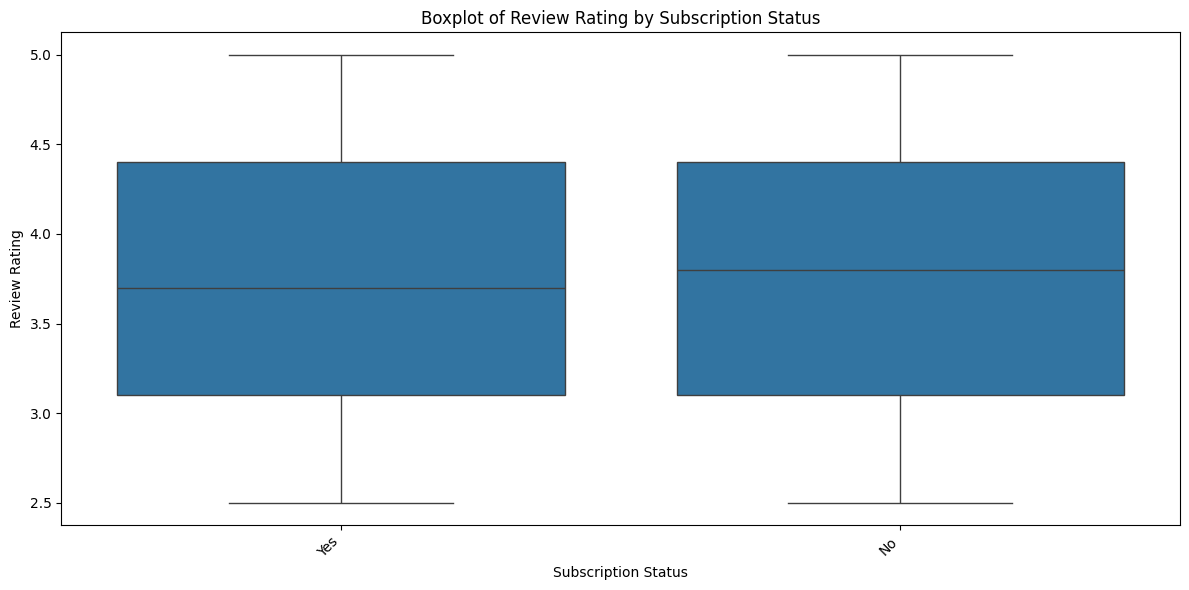

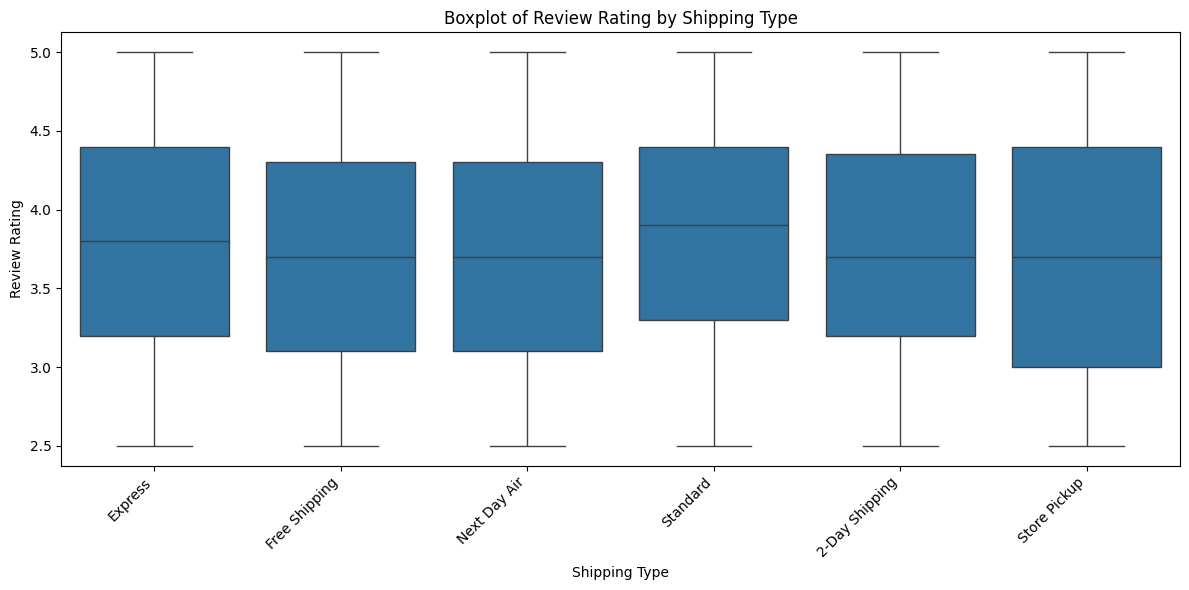

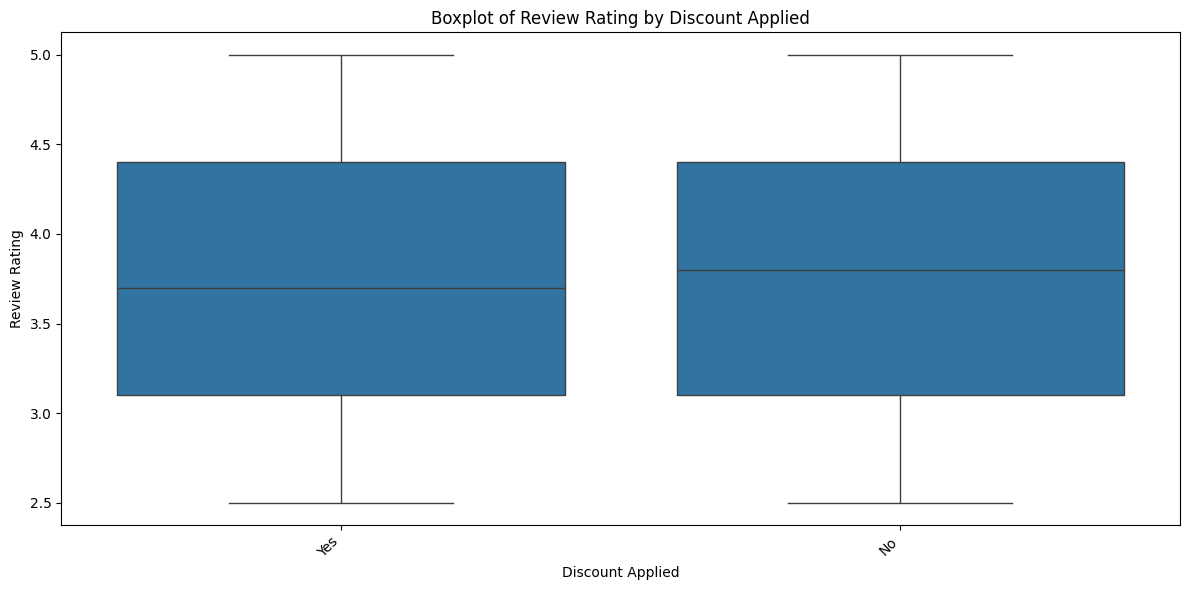

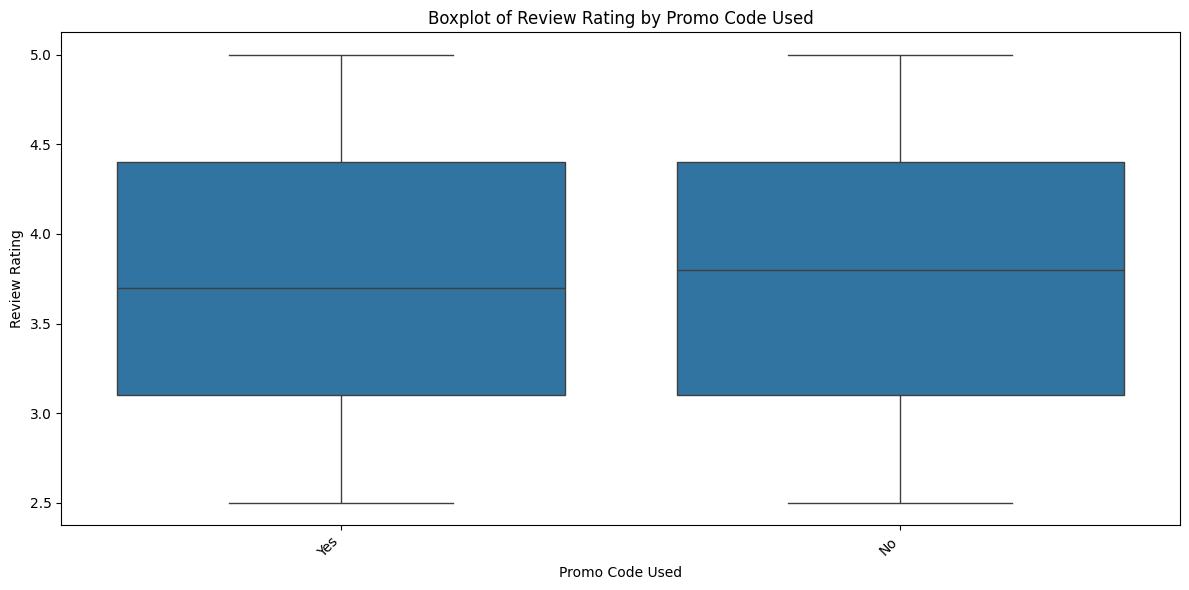

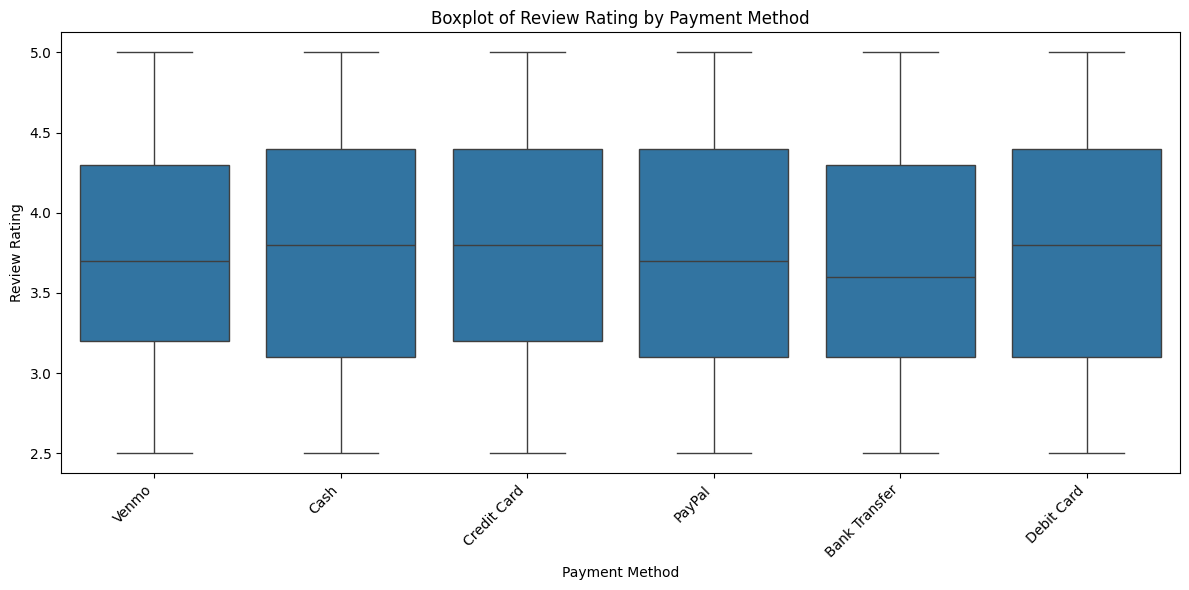

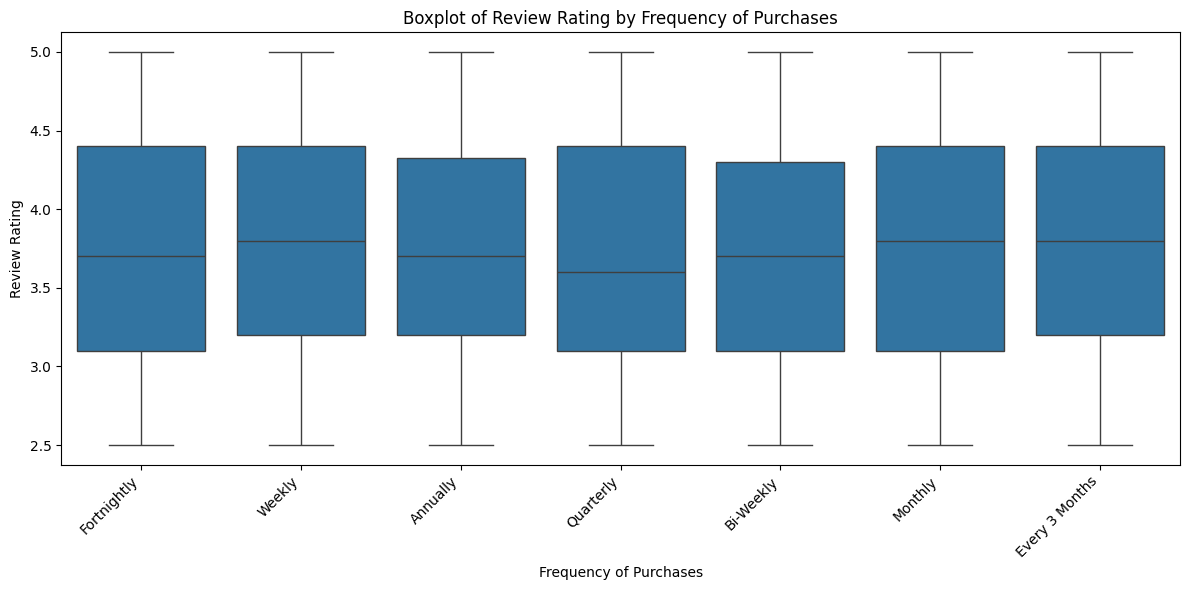

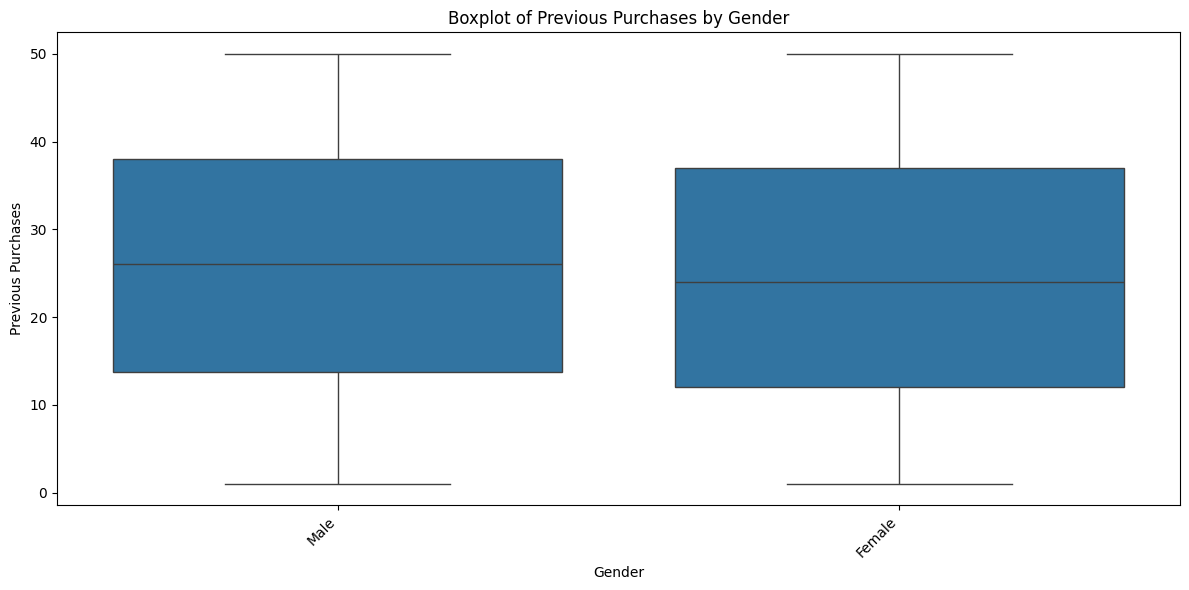

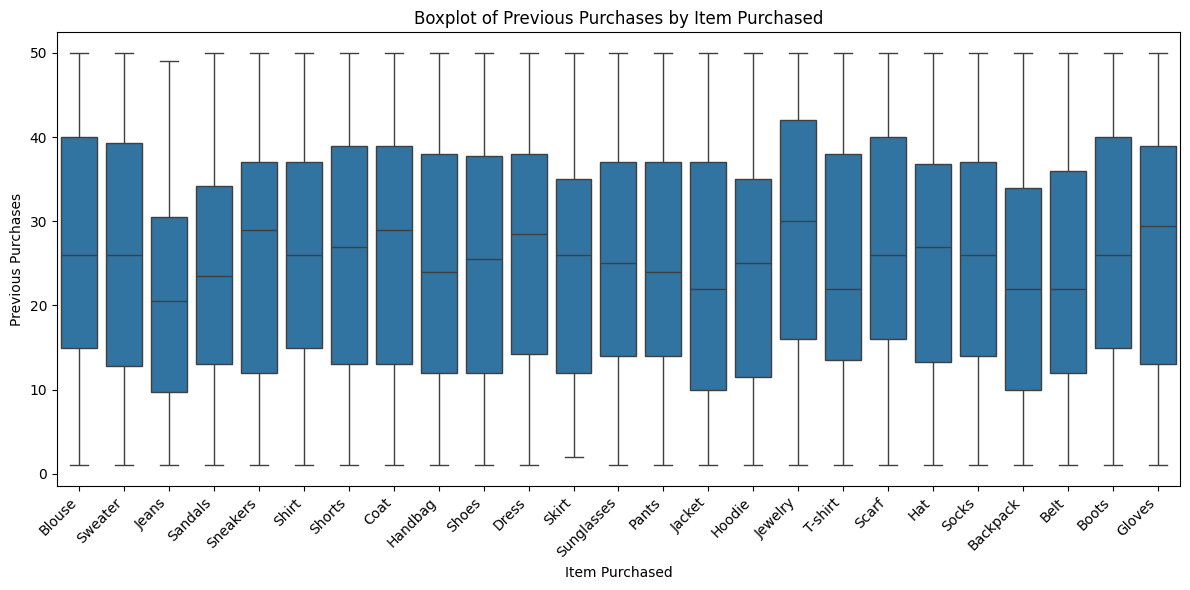

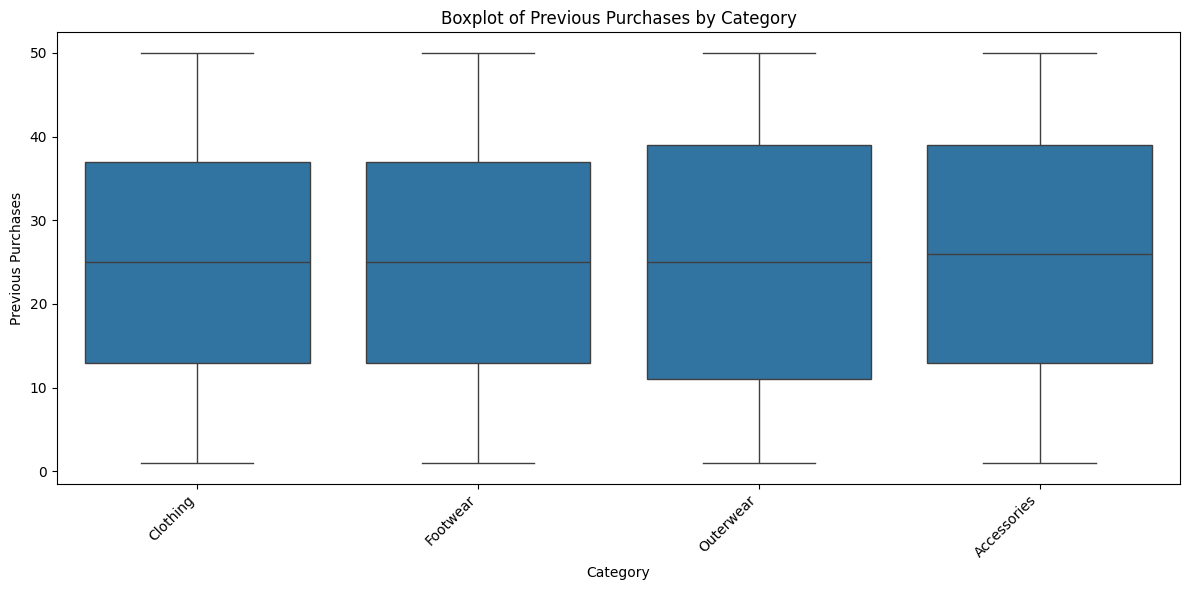

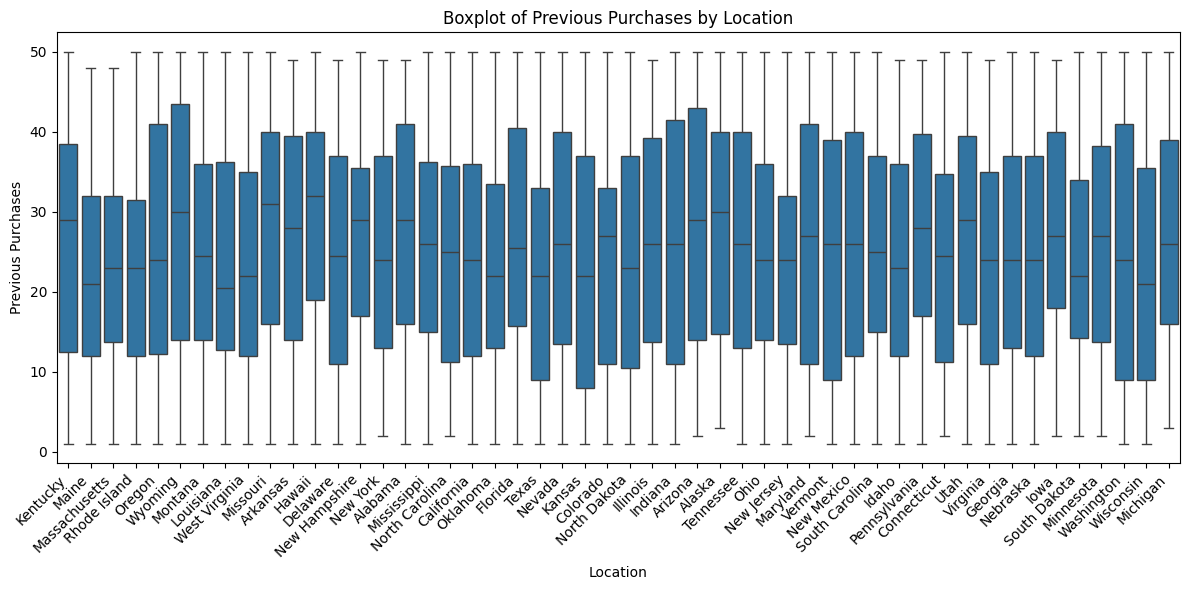

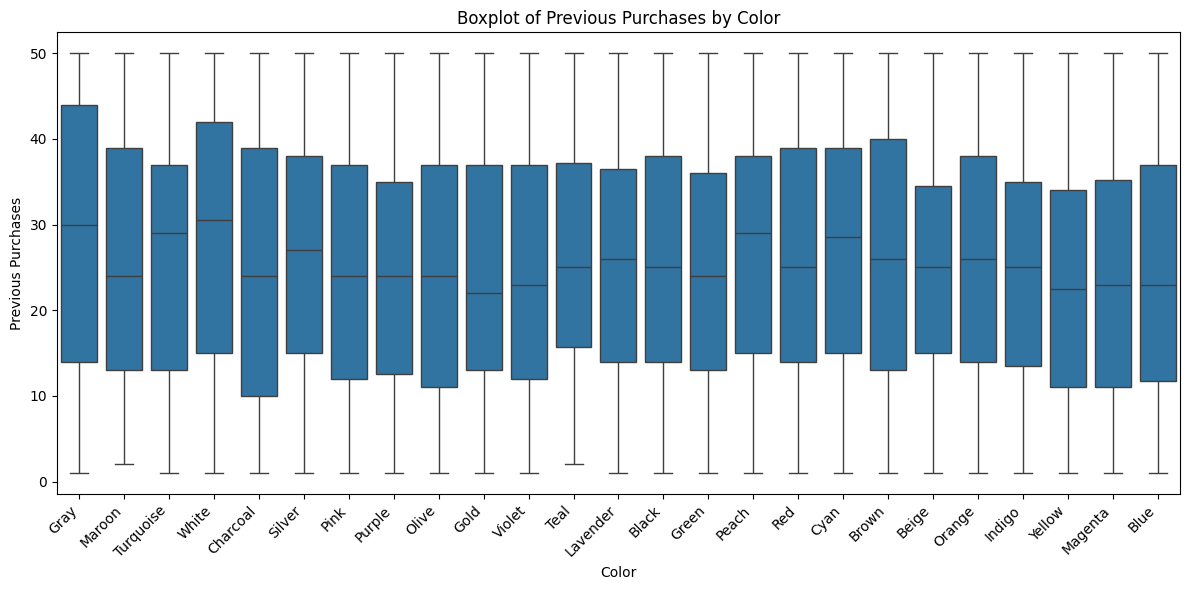

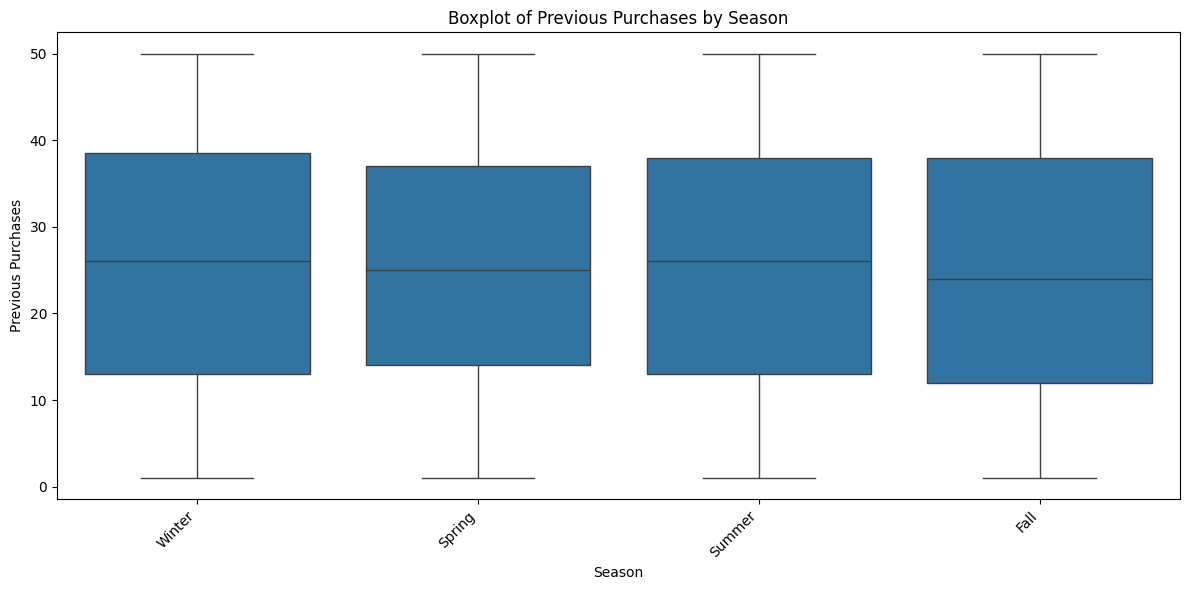

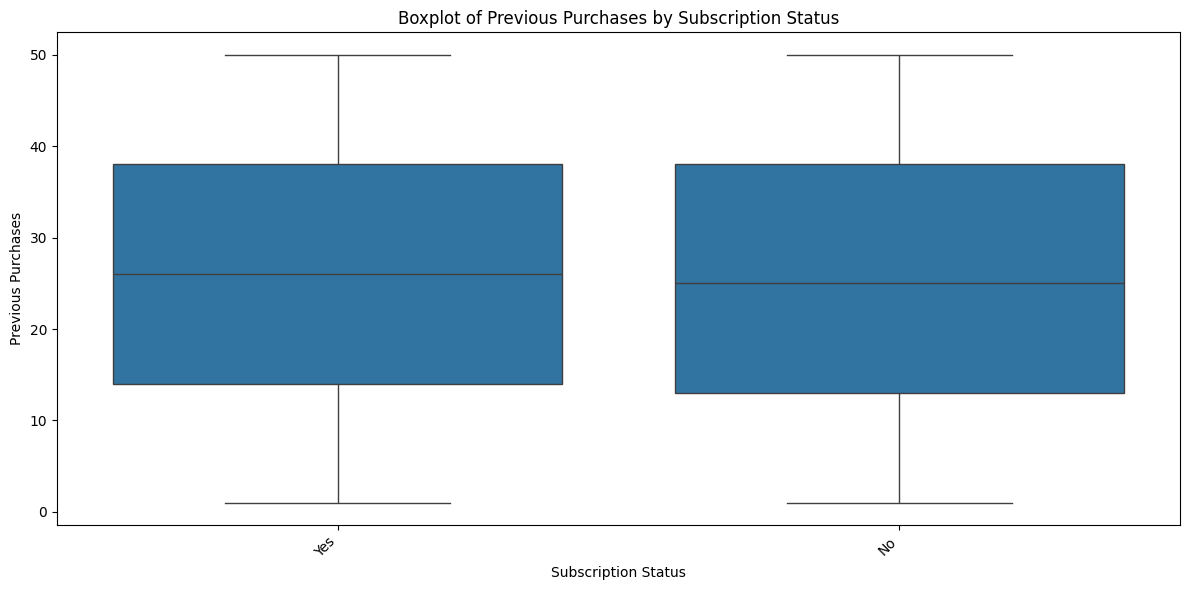

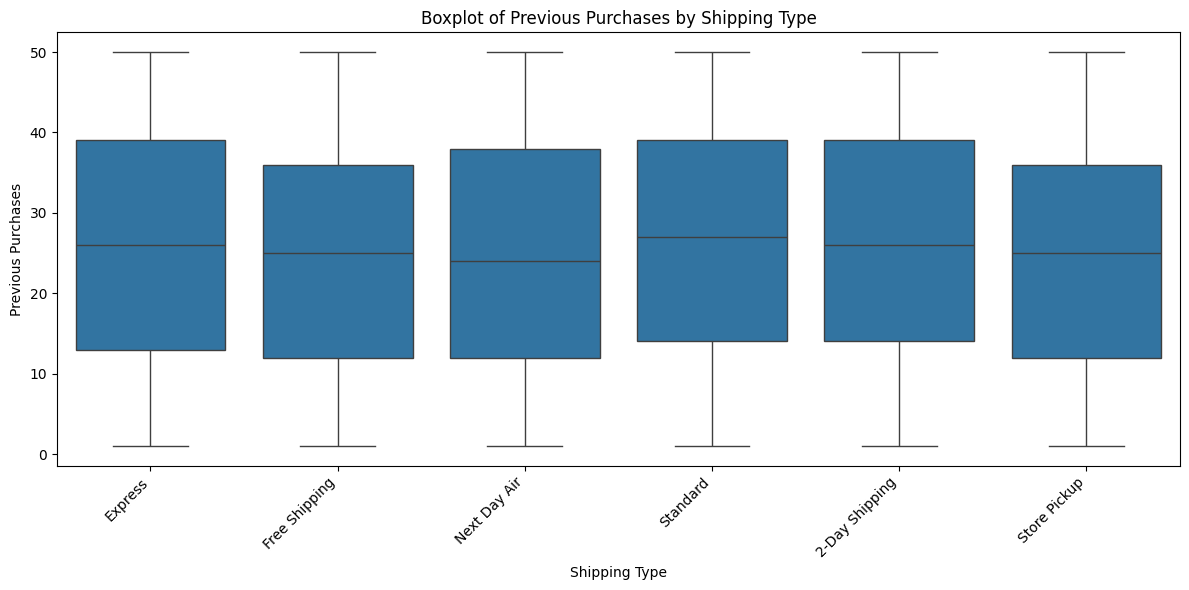

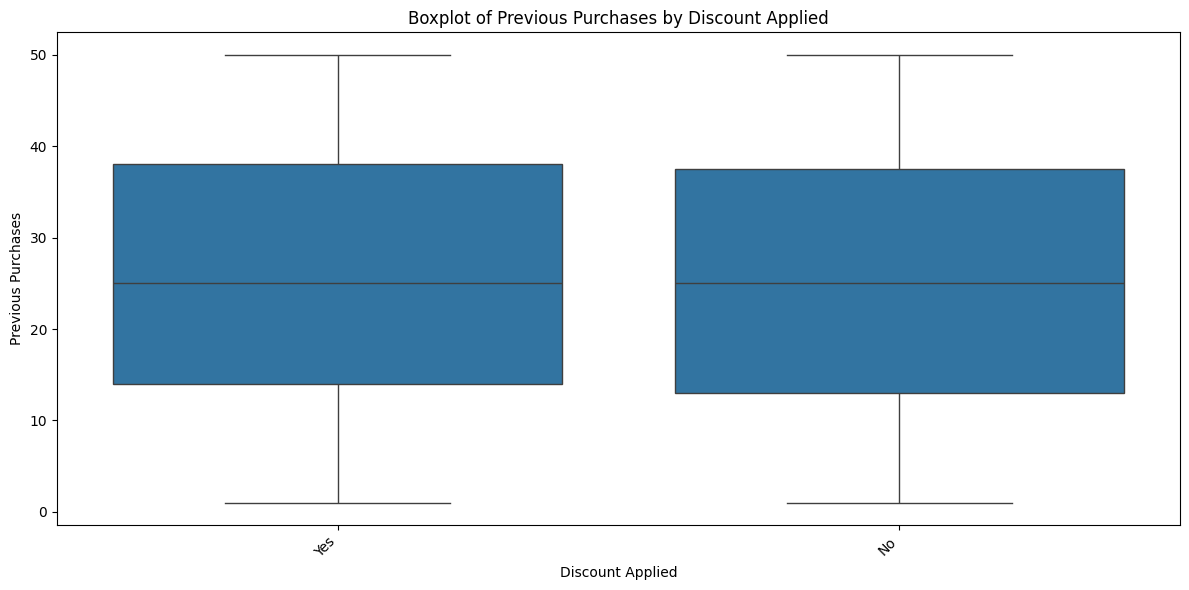

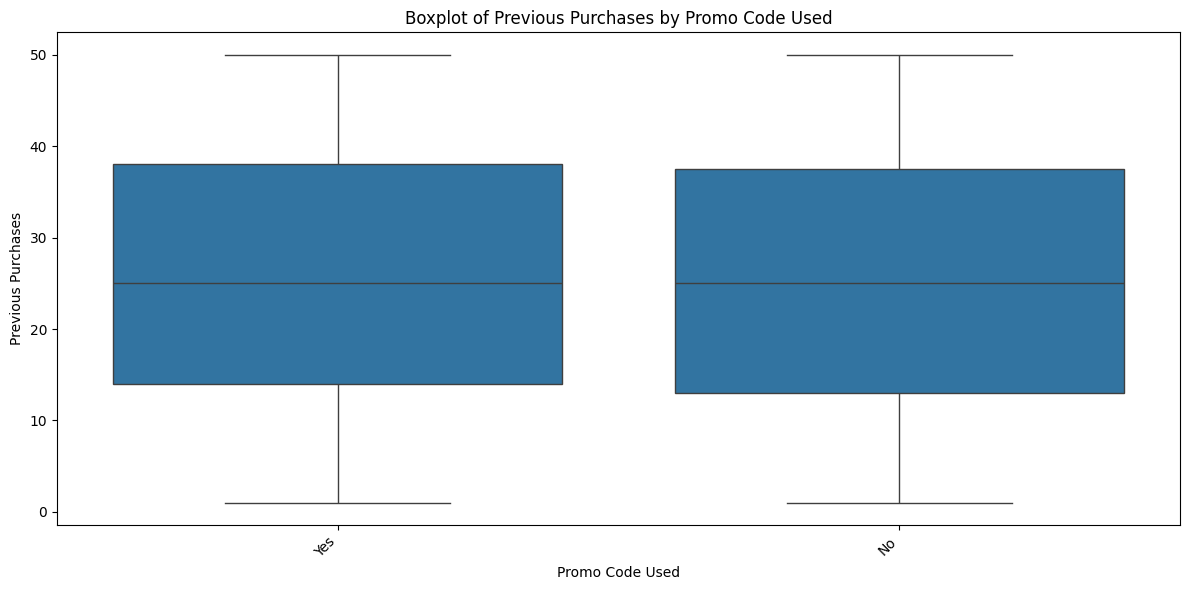

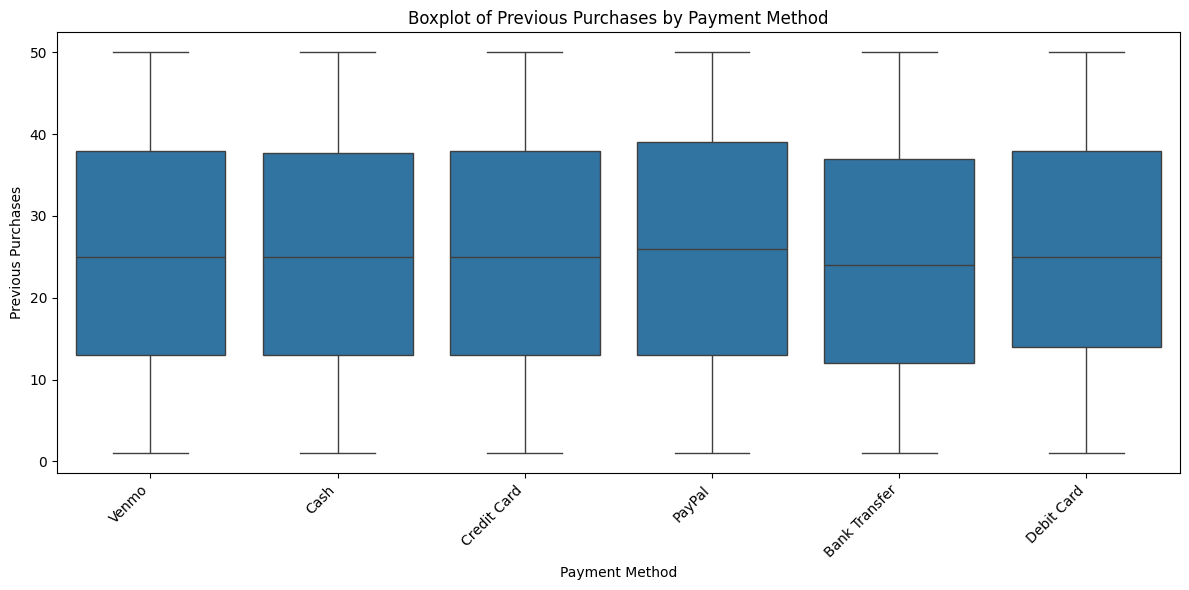

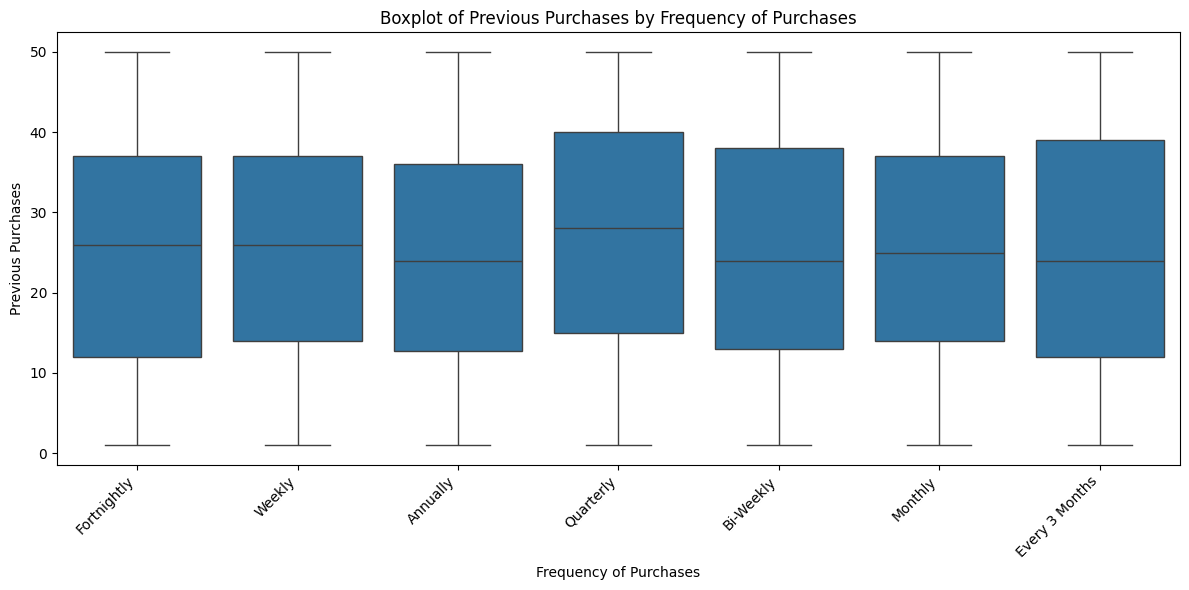

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
cat_cols =  [col for col in df.columns if df[col].dtype=="object"]

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(12, 6))  # Adjust figure size if needed
        sns.boxplot(data=df, x=cat_col, y=num_col)  # Create boxplot
        plt.title(f"Boxplot of {num_col} by {cat_col}")  # Set title
        plt.xlabel(cat_col)  # Set x-axis label
        plt.ylabel(num_col)  # Set y-axis label
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlapping labels
        plt.show()  # Display the plot

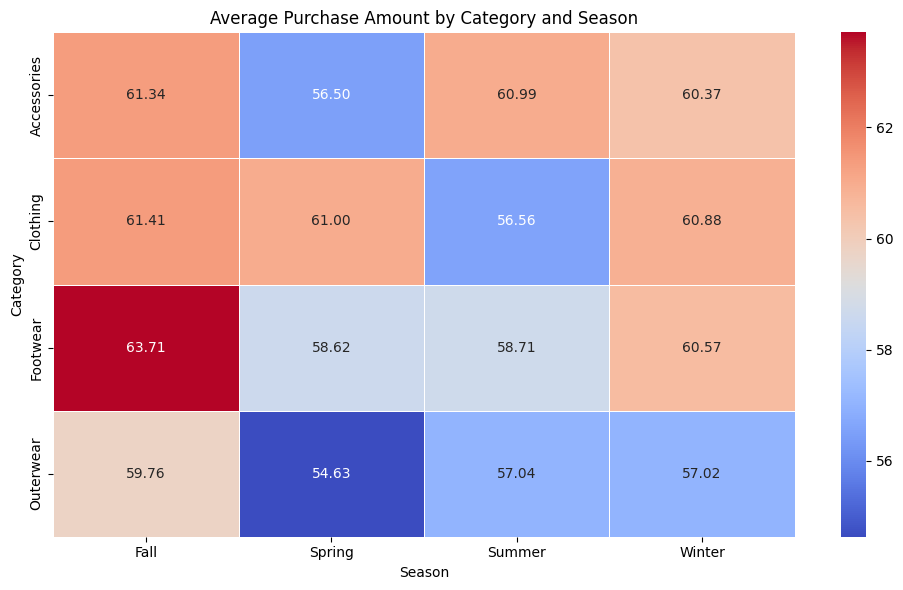

In [ ]:
#average purchase amount by category and season
#group by category and season, calculate mean amount
heatmap_data = df.groupby(["Category", "Season"])["Purchase Amount (USD)"].mean().unstack()
#create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidth=.5)
plt.title("Average Purchase Amount by Category and Season")
plt.tight_layout()
plt.show()

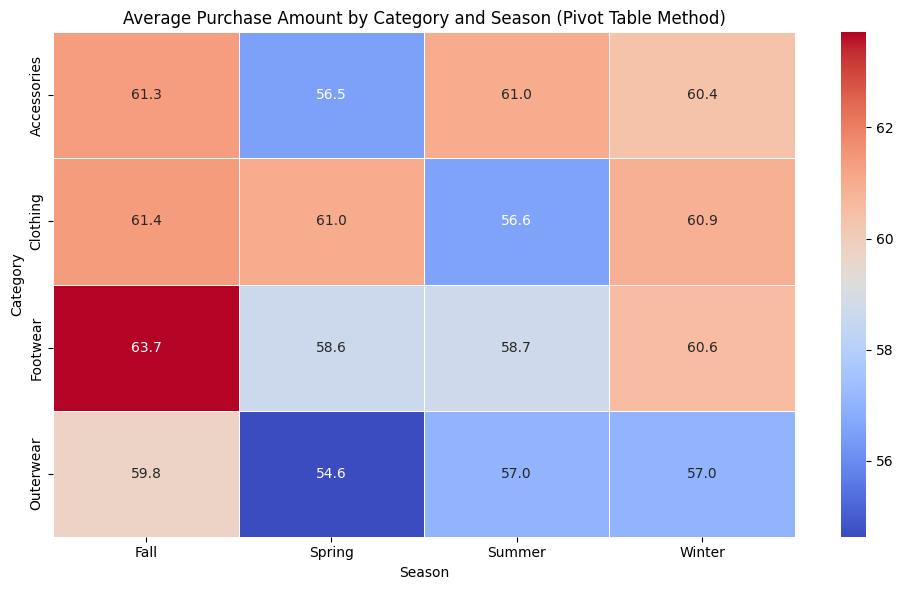

In [ ]:
# Create pivot table (alternative to groupby().unstack())
heatmap_data = df.pivot_table(
    values='Purchase Amount (USD)',
    index='Category',
    columns='Season',
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Average Purchase Amount by Category and Season (Pivot Table Method)')
plt.tight_layout()
plt.show()

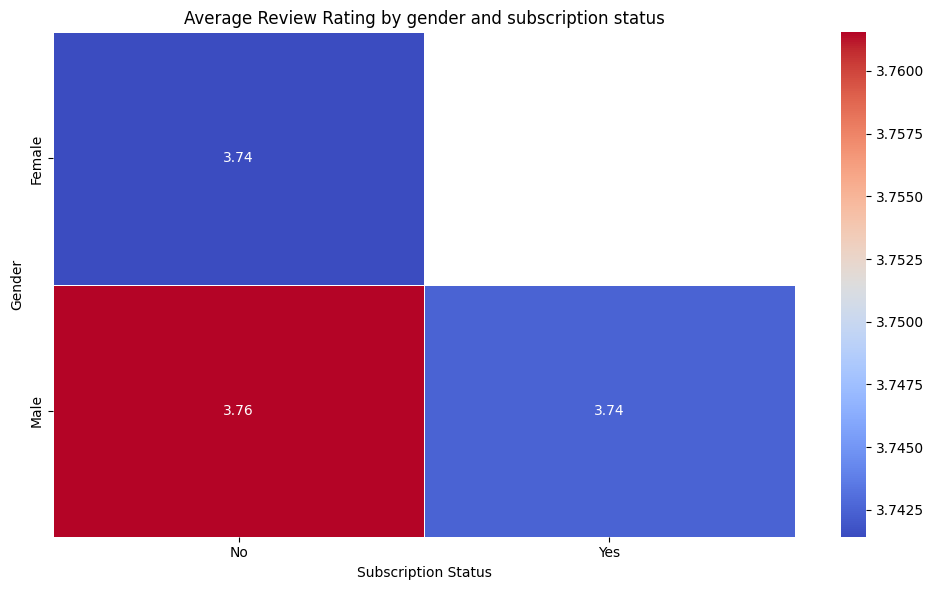

In [ ]:
#review rating by gender and subscription status
#group by gender and subscription status, calculate mean review rating
heatmap_data = df.groupby(["Gender", "Subscription Status"])["Review Rating"].mean().unstack()
#create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidth=.5)
plt.title("Average Review Rating by gender and subscription status")
plt.tight_layout()
plt.show()

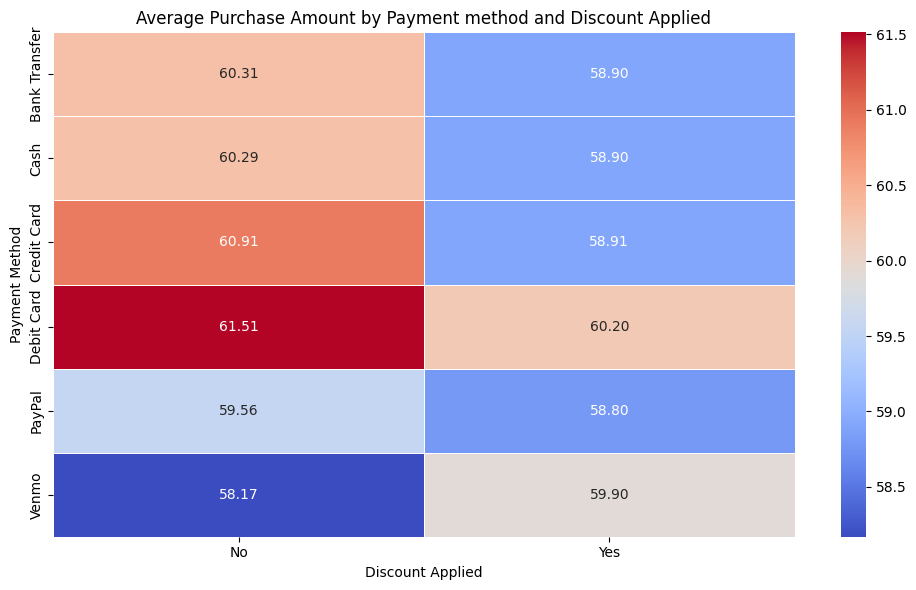

In [ ]:
#purchase frequency by payment method and discount applied
#create a cross tab for frequency
heatmap_data = pd.crosstab(df["Payment Method"], df["Discount Applied"], values=df["Purchase Amount (USD)"], aggfunc="mean")
#create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Average Purchase Amount by Payment method and Discount Applied")
plt.tight_layout()
plt.show()

<ipython-input-21-3873441198>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["Age Group", "Frequency of Purchases"])["Previous Purchases"].mean().unstack()


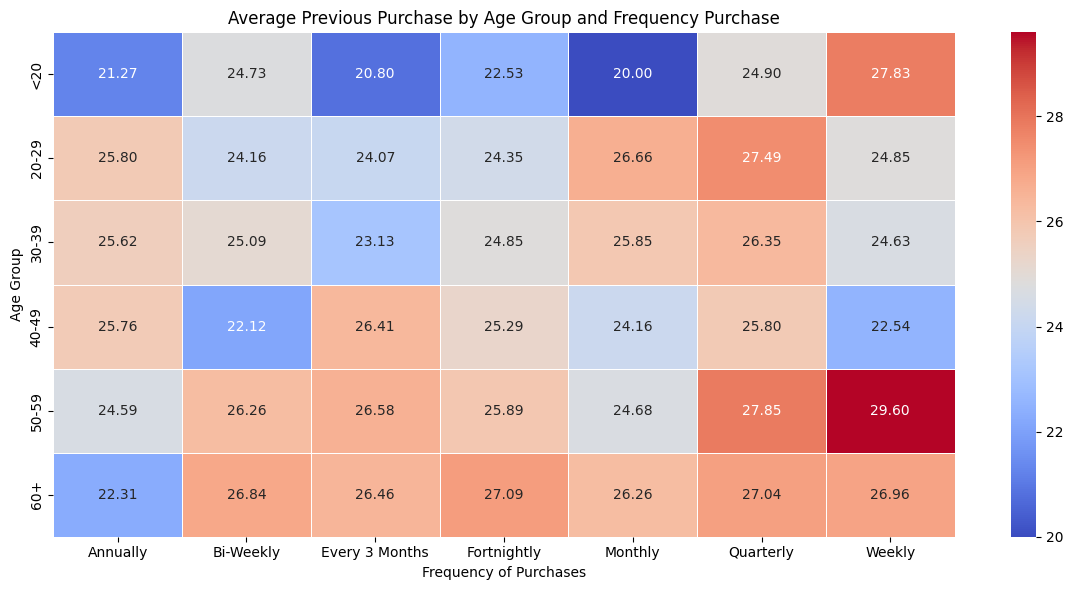

In [ ]:
#previous purchase by age group and frequency of purchases
df["Age Group"] = pd.cut(df["Age"], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])
#group data
heatmap_data = df.groupby(["Age Group", "Frequency of Purchases"])["Previous Purchases"].mean().unstack()
#creat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Average Previous Purchase by Age Group and Frequency Purchase")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#select features and preprocess
X = df[["Age", "Purchase Amount (USD)", "Previous Purchases"]]
X = StandardScaler().fit_transform(X)
#cluster
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
#analyse clusters
# Select only numeric columns before calculating the mean
numeric_cols_for_mean = df.select_dtypes(include=['number']).columns.tolist()
print(df.groupby("Cluster")[numeric_cols_for_mean].mean())

         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1962.443970  56.780149              82.472785       3.796371   
1        1977.266208  32.372299              63.258350       3.750196   
2        1920.325806  30.949462              57.781720       3.763118   
3        1940.275862  56.084729              37.113300       3.694778   

         Previous Purchases  Cluster  
Cluster                               
0                 28.302028      0.0  
1                 11.209234      1.0  
2                 38.545161      2.0  
3                 24.723153      3.0  


In [ ]:
#check if other features corelate with clusters
#compare payment methods across clusters
print(df.groupby("Cluster")["Payment Method"].value_counts(normalize=True))
#analyse popular categories per cluster
print(df.groupby("Cluster")["Category"].value_counts())

Cluster  Payment Method
0        Credit Card       0.184632
         Debit Card        0.169691
         Cash              0.167556
         PayPal            0.167556
         Bank Transfer     0.164354
         Venmo             0.146211
1        Debit Card        0.170923
         Credit Card       0.169941
         Cash              0.168959
         PayPal            0.166012
         Venmo             0.164047
         Bank Transfer     0.160118
2        Cash              0.179570
         PayPal            0.173118
         Credit Card       0.169892
         Venmo             0.169892
         Debit Card        0.161290
         Bank Transfer     0.146237
3        PayPal            0.187192
         Cash              0.171429
         Venmo             0.169458
         Credit Card       0.164532
         Bank Transfer     0.156650
         Debit Card        0.150739
Name: proportion, dtype: float64
Cluster  Category   
0        Clothing       417
         Accessories    300
  

In [ ]:
#create a radar chart to compare clusters visuallly
import plotly.express as px
#aggregate cluster means
cluster_means = df.groupby("Cluster")[["Age", "Purchase Amount (USD)", "Previous Purchases"]].mean().reset_index()
#plot
fig = px.line_polar(cluster_means, r="Purchase Amount (USD)", theta="Cluster", line_close=True, template="plotly_dark")
fig.show()

In [ ]:
#validate clusters
from sklearn.metrics import silhouette_score
print(f"Silhouette Score:{silhouette_score(X, df['Cluster']):.2f}")

Silhouette Score:0.27


In [ ]:
import plotly.express as px

cluster_means = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].mean().reset_index()
fig = px.line_polar(cluster_means, r='Purchase Amount (USD)', theta='Cluster',
                    line_close=True, template='plotly_dark',
                    title='Spending Power by Cluster')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='Purchase Amount (USD)', z='Previous Purchases',
                    color='Cluster', title='Customer Clusters based on Age, Purchase Amount, and Previous Purchases')
fig.show()

In [ ]:
import plotly.express as px

# Improved 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Age',
    y='Purchase Amount (USD)',
    z='Previous Purchases',
    color='Cluster',
    title='<b>3D Customer Segmentation</b><br><sup>High-value older customers vs. frequent young buyers</sup>',
    labels={
        'Age': 'Age (years)',
        'Purchase Amount (USD)': 'Purchase Amount ($)',
        'Previous Purchases': 'Loyalty (Previous Purchases)'
    },
    hover_data=['Gender', 'Category', 'Payment Method'],  # Add key info on hover
    color_discrete_sequence=px.colors.qualitative.Vivid,  # More distinct colors
    opacity=0.8,
    height=800,
    width=1000
)

# Enhanced layout
fig.update_layout(
    scene=dict(
        xaxis_title='<b>AGE</b> → Older customers to right',
        yaxis_title='<b>SPENDING</b> → Higher amounts up',
        zaxis_title='<b>LOYALTY</b> → More purchases up',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))  # Better initial view
    ),
    margin=dict(l=0, r=0, b=80, t=100),
    legend=dict(
        title_text='<b>Cluster</b>',
        itemsizing='constant',
        yanchor='top',
        y=0.99,
        xanchor='left',
        x=0.01
    )
)

# Add cluster descriptions as annotations
cluster_descriptions = [
    "<b>Cluster 0</b>: High-spending older customers",
    "<b>Cluster 1</b>: Mid-spending young adults",
    "<b>Cluster 2</b>: Frequent but low-spending",
    "<b>Cluster 3</b>: Budget-conscious older"
]

fig.add_annotation(
    text="<br>".join(cluster_descriptions),
    xref="paper", yref="paper",
    x=1.05, y=0.5,
    showarrow=False,
    align="left",
    bordercolor="#c7c7c7",
    borderwidth=1,
    borderpad=4,
    bgcolor="#f9f9f9"
)

fig.show()